<a href="https://colab.research.google.com/github/BalytskyiJaroslaw/PathogensRamanOpenSet/blob/main/EOS_K_p1_p2_I_p3_submit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Operating in the ***open*** world, Entropic Open Set, $\mathcal{K} = p_1 + p_2$, $\mathcal{I} = p_3$

In [ ]:
from __future__ import absolute_import
from __future__ import print_function

import numpy as np
from numpy import genfromtxt
from sklearn.utils import shuffle


import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
from pandas import read_csv

from keras.layers import Lambda, Multiply

import csv
import pprint

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

import keras
#from keras.utils import to_categorical
from pandas import read_csv
from keras.models import Sequential
from keras import layers
#from keras.optimizers import SGD
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense
#from keras.optimizers import SGD

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import random
from pprint import pprint

from sklearn.preprocessing import LabelEncoder
import gspread
import pandas as pd
import pickle
import pywt
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
#from keras.utils import to_categorical

from time import time
t00 = time()
import os
from tensorflow.keras import layers
from keras.layers import Input, Dense, concatenate
from keras.models import Model
from keras.layers import GlobalAveragePooling1D

In [ ]:
# Initialize the TPU and spread the computations across the 8 cores
import tensorflow as tf
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='')
tf.config.experimental_connect_to_cluster(resolver)
# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
tf.config.list_logical_devices('TPU')
#print("All devices: ", tf.config.list_logical_devices('TPU'))

strategy = tf.distribute.TPUStrategy(resolver)

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


# Reference dataset

In [ ]:
# Reference data
data_X_reference = np.load("/content/gdrive/MyDrive/Stanford_data/X_reference.npy")
# Test data
data_X_test = np.load("/content/gdrive/MyDrive/Stanford_data/X_test.npy")

data_y_reference = np.load("/content/gdrive/MyDrive/Stanford_data/y_reference.npy")
# Test labels
data_y_test = np.load("/content/gdrive/MyDrive/Stanford_data/y_test.npy")

data_y_reference_int = []

for i in range(data_y_reference.shape[0]):
  data_y_reference_int.append(int(data_y_reference[i]))

data_y_test_int = []

for i in range(data_y_test.shape[0]):
  data_y_test_int.append(int(data_y_test[i]))

train_label = tf.keras.utils.to_categorical(data_y_reference_int)
test_label = tf.keras.utils.to_categorical(data_y_test_int)

# $\mathcal{K} = p_1 + p_2$, reference indices, traininig dataset: 18000 - 26000, 28000 - 38000, 44000 - 50000, 52000 - 58000. $\mathcal{I} = p_3$, reference indices: 10000 - 14000, 26000 - 28000, 42000 - 44000, 58000 - 60000.

In [ ]:
indices =[slice(18000, 26000),slice(28000, 38000),slice(44000, 50000),slice(52000, 58000),slice(10000, 14000),slice(26000, 28000),slice(42000, 44000),slice(58000, 60000)]

Known_and_Ignored_data_X_reference = np.concatenate([data_X_reference[idx, :] for idx in indices], axis=0)

Known_and_Ignored_data_X_train_label_int = []

for i in range(2000*15):
  Known_and_Ignored_data_X_train_label_int.append(int(data_y_reference[i]))

for i in range(2000*5):
 Known_and_Ignored_data_X_train_label_int.append(int(data_y_reference[2000*15]))

Known_and_Ignored_data_X_train_label = tf.keras.utils.to_categorical(Known_and_Ignored_data_X_train_label_int)
print("Shape of the known and ignored data, reference:", Known_and_Ignored_data_X_reference.shape)
print("Shape of the known and ignored labels, reference:", Known_and_Ignored_data_X_train_label.shape)

Shape of the known and ignored data, reference: (40000, 1000)
Shape of the known and ignored labels, reference: (40000, 16)


# $\mathcal{K}$, known reference indices for the ***test***: 900 - 1300, 1400 - 1900, 2200 - 2500, 2600 - 2900. Ignored, ***test***: 500 - 700, 1300 - 1400, 2100 - 2200, 2900 - 3000.


In [ ]:
indices =[slice(900, 1300),slice(1400, 1900),slice(2200, 2500),slice(2600, 2900),slice(500, 700),slice(1300, 1400),slice(2100, 2200),slice(2900, 3000)]

Known_and_Ignored_data_X_test = np.concatenate([data_X_test[idx, :] for idx in indices], axis=0)

Known_and_Ignored_data_X_test_label_int = []

for i in range(100*15):
  Known_and_Ignored_data_X_test_label_int.append(int(data_y_test[i]))

for i in range(100*5):
  Known_and_Ignored_data_X_test_label_int.append(int(data_y_test[100*15]))

Known_and_Ignored_data_X_test_label = tf.keras.utils.to_categorical(Known_and_Ignored_data_X_test_label_int)
print("Shape of the known and ignored data, reference:", Known_and_Ignored_data_X_test.shape)
print("Shape of the known and ignored labels, reference:", Known_and_Ignored_data_X_test_label.shape)

Shape of the known and ignored data, reference: (2000, 1000)
Shape of the known and ignored labels, reference: (2000, 16)


# Leave only $\mathcal{K}$ samples to test the accuracy. This is done to keep the right shape of the labels.

In [ ]:
Known_data_X_test = Known_and_Ignored_data_X_test[:-100*5]
Known_data_X_test_label = Known_and_Ignored_data_X_test_label[:-100*5]
print("Shape of the known and ignored data, reference:", Known_data_X_test.shape)
print("Shape of the known and ignored labels, reference:", Known_data_X_test_label.shape)

Shape of the known and ignored data, reference: (1500, 1000)
Shape of the known and ignored labels, reference: (1500, 16)


In [ ]:
Known_data_X_test,Known_data_X_test_label



(array([[0.19160232, 0.2065446 , 0.28030002, ..., 0.23563497, 0.37440253,
         0.1234429 ],
        [0.30638947, 0.29189973, 0.28482594, ..., 0.35895567, 0.55908956,
         0.40961024],
        [0.3213789 , 0.32928288, 0.38951619, ..., 0.21157556, 0.38176924,
         0.33508562],
        ...,
        [0.33129924, 0.50316593, 0.48168109, ..., 0.31934845, 0.50384262,
         0.36210063],
        [0.2686855 , 0.31092569, 0.35315376, ..., 0.299829  , 0.44510472,
         0.5176395 ],
        [0.29036289, 0.28097208, 0.41715097, ..., 0.57850548, 0.49272637,
         0.58893971]]),
 array([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.]], dtype=float32))

# Defining the $\mathcal{K}$ labels

In [ ]:
KnownLabels = []
# 0 - 5
KnownLabels.append(Known_and_Ignored_data_X_train_label[1 + 0*2000])
KnownLabels.append(Known_and_Ignored_data_X_train_label[1 + 1*2000])
KnownLabels.append(Known_and_Ignored_data_X_train_label[1 + 2*2000])
KnownLabels.append(Known_and_Ignored_data_X_train_label[1 + 3*2000])
KnownLabels.append(Known_and_Ignored_data_X_train_label[1 + 4*2000])

# 6 - 10
KnownLabels.append(Known_and_Ignored_data_X_train_label[1 + 5*2000])
KnownLabels.append(Known_and_Ignored_data_X_train_label[1 + 6*2000])
KnownLabels.append(Known_and_Ignored_data_X_train_label[1 + 7*2000])
KnownLabels.append(Known_and_Ignored_data_X_train_label[1 + 8*2000])
KnownLabels.append(Known_and_Ignored_data_X_train_label[1 + 9*2000])

# 10 - 15
KnownLabels.append(Known_and_Ignored_data_X_train_label[1 + 10*2000])
KnownLabels.append(Known_and_Ignored_data_X_train_label[1 + 11*2000])
KnownLabels.append(Known_and_Ignored_data_X_train_label[1 + 12*2000])
KnownLabels.append(Known_and_Ignored_data_X_train_label[1 + 13*2000])
KnownLabels.append(Known_and_Ignored_data_X_train_label[1 + 14*2000])

Ignored_label = Known_and_Ignored_data_X_train_label[1 + 15*2000]

In [ ]:
KnownLabels

[array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32),
 array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32),
 array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32),
 array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 

# The ignored label $\mathcal{I}$ is:

In [ ]:
Ignored_label

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
      dtype=float32)

# Never seen before samples, $\mathcal{N}$, first seen during the test: 0 - 500, 700 - 900, 1900 - 2100, 2500 - 2600.

In [ ]:
indices = [slice(0, 500),slice(700, 900),slice(1900, 2100),slice(2500, 2600)]
NeverSeen_data_X_test = np.concatenate([data_X_test[idx, :] for idx in indices], axis=0)

print("Shape of the NeverSeen data, test:", NeverSeen_data_X_test.shape)

Shape of the NeverSeen data, test: (1000, 1000)


# Data for finetuning

In [ ]:
# Finetuning
data_X_finetune = np.load("/content/gdrive/MyDrive/Stanford_data/X_finetune.npy")
# Test data
data_X_test = np.load("/content/gdrive/MyDrive/Stanford_data/X_test.npy")

data_y_finetune = np.load("/content/gdrive/MyDrive/Stanford_data/y_finetune.npy")
# Test labels
data_y_test = np.load("/content/gdrive/MyDrive/Stanford_data/y_test.npy")

data_y_finetune_int = []

for i in range(data_y_finetune.shape[0]):
  data_y_finetune_int.append(int(data_y_finetune[i]))

data_y_test_int = []

for i in range(data_y_test.shape[0]):
  data_y_test_int.append(int(data_y_test[i]))

train_label = tf.keras.utils.to_categorical(data_y_finetune_int)
test_label = tf.keras.utils.to_categorical(data_y_test_int)

#data_X_finetune, train_label = shuffle(data_X_finetune, train_label)



Known data, $\mathcal{K}$, for the finetuning: 900 - 1300, 1400 - 1900, 2200 - 2500, 2600 - 2900. Ignored samples, $\mathcal{I}$, finetuning: 500 - 700, 1300 - 1400, 2100 - 2200, 2900 - 3000.

In [ ]:
indices = [slice(900, 1300),slice(1400, 1900),slice(2200, 2500),slice(2600, 2900),slice(500, 700),slice(1300, 1400),slice(2100, 2200),slice(2900, 3000)]

Known_and_Ignored_data_X_finetune = np.concatenate([data_X_finetune[idx, :] for idx in indices], axis=0)

Known_and_Ignored_data_X_finetune_label_int = []

for i in range(100*15):
  Known_and_Ignored_data_X_finetune_label_int.append(int(data_y_finetune[i]))

for i in range(100*5):
  Known_and_Ignored_data_X_finetune_label_int.append(int(data_y_finetune[100*15]))

Known_and_Ignored_data_X_finetune_label = tf.keras.utils.to_categorical(Known_and_Ignored_data_X_finetune_label_int)

print("Shape of the known and ignored data, finetune:", Known_and_Ignored_data_X_finetune.shape)
print("Shape of the known and ignored labels, finetune:", Known_and_Ignored_data_X_finetune_label.shape)

Shape of the known and ignored data, finetune: (2000, 1000)
Shape of the known and ignored labels, finetune: (2000, 16)


# Uploading the libraries

In [ ]:
# Create a checkpoint directory to store the checkpoints.
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")

import numpy as np
import pandas as pd
import seaborn as sns
from numpy import interp
from itertools import cycle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#from sklearn.metrics import mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score, roc_curve, plot_roc_curve
from sklearn.metrics import confusion_matrix, classification_report, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from keras.layers import Input, Conv1D, MaxPooling1D, UpSampling1D, concatenate, BatchNormalization, Activation, add
from keras.layers import Conv2D, MaxPooling2D, Reshape, Flatten, Dense, GlobalAveragePooling1D, GlobalMaxPooling1D, Multiply, Conv1DTranspose, LeakyReLU, Dropout
from keras.models import Model, model_from_json
#from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
sns.set_theme(style="whitegrid")

# Defining our model

In [ ]:
# Constants
NoF = 64  # Number of filters in the first convolutional layer
SE_RATIO = 16  # Squeeze-and-Excitation ratio

initializer = tf.keras.initializers.GlorotUniform(seed=0)
initializer2 = tf.keras.initializers.HeUniform(seed=0)

def squeeze_excitation_block(X, ratio=16):
    num_channels = X.shape[-1]
    se = tf.keras.layers.GlobalAveragePooling1D()(X)
    se = tf.keras.layers.Reshape((1, num_channels))(se)
    se = tf.keras.layers.Dense(num_channels // ratio, activation='relu', kernel_initializer=initializer)(se)
    se = tf.keras.layers.Dense(num_channels, activation='sigmoid', kernel_initializer=initializer)(se)
    return tf.keras.layers.Multiply()([X, se])


from tensorflow.keras.layers import Conv1D, BatchNormalization, Activation, Add
from tensorflow.keras import models, layers
from tensorflow.keras import regularizers

initializer = tf.keras.initializers.GlorotUniform(seed=0)
initializer2 = tf.keras.initializers.HeUniform(seed=0)
Stride=1

def identity_block(X, f, filters, stage, block):

  #defining name basis
  ConvNameBase = 'res' + str(stage) + block + '_branch'
  BatchNormBase = 'bn' + str(stage) + block + '_branch'

  #retrieve filters
  F1,F2,F3 = filters

  #save the input value. You'll need this later to add back the main path
  x_shortcut = X

  ### First component of the main path ###
  X = tf.keras.layers.Conv1D(filters=F1, kernel_size=1, strides=Stride, padding='same',
             kernel_initializer=initializer#, name=ConvNameBase
             )(X)
  X = tf.keras.layers.BatchNormalization(axis=2, momentum=0.99, trainable=False,
                         )(X)
  X = tf.keras.layers.Activation('relu')(X)

  ### Second component of main path ###
  X = tf.keras.layers.Conv1D(filters=F2, kernel_size=f, strides=Stride, padding='same',
             kernel_initializer=initializer, #name=ConvNameBase
             )(X)
  X = tf.keras.layers.BatchNormalization(axis=2, momentum=0.99, trainable=False,
                         )(X)
  X = tf.keras.layers.Activation('relu')(X)

  #Third Component of main path
  X = tf.keras.layers.Conv1D(filters=F3, kernel_size=1, strides=Stride, padding='same',
             kernel_initializer=initializer#,name=ConvNameBase
             )(X)
  X = tf.keras.layers.BatchNormalization(axis=2, momentum=0.99, trainable=False,
                         )(X)

  #Final step: add shortcut to the main path, and pass it through ReLU activation
  X = tf.keras.layers.Add()([X, x_shortcut])
  X = tf.keras.layers.Activation('relu')(X)

  return X

def convolutional_block(X, f, filters, stage, block, s=2):

  #Defining name bases
  ConvNameBase = 'res' + str(stage) + block + '_branch'
  BatchNormBase = 'res' + str(stage) + block + '_branch'

  #retrive n_filters
  F1, F2, F3 = filters

  #Save the input value
  x_shortcut = X

  #First component of the main path
  X = tf.keras.layers.Conv1D(F1, strides=s, kernel_size=f, kernel_initializer=initializer,
             padding='same'#, name=ConvNameBase
             )(X)
  X = tf.keras.layers.BatchNormalization(axis=2, momentum=0.99, trainable=False,
                         )(X)
  X = tf.keras.layers.Activation('relu')(X)

  #Second Component of main path
  X = tf.keras.layers.Conv1D(filters=F2, kernel_size=f, strides=Stride, padding='same',
             kernel_initializer=initializer#, name=ConvNameBase
             )(X)
  X = tf.keras.layers.BatchNormalization(axis=2, momentum=0.99, trainable=False,
                         )(X)
  X = tf.keras.layers.Activation('relu')(X)

  #Third component of main path
  X = tf.keras.layers.Conv1D(filters=F3, kernel_size=f, strides=Stride, padding='same',
             kernel_initializer=initializer, name=ConvNameBase)(X)
  X = tf.keras.layers.BatchNormalization(axis=2, momentum=0.99, trainable=False,
  )(X)

  ###### SHORTCUT PATH ######
  x_shortcut = tf.keras.layers.Conv1D(filters = F3, kernel_size=1, strides=s,
                      padding='same', #name=ConvNameBase,
                      kernel_initializer=initializer)(x_shortcut)
  x_shortcut = tf.keras.layers.BatchNormalization(axis=2, momentum=0.99, trainable=False,
                                  )(x_shortcut)

  #Add shortcut to main path and pass in through ReLU activation
  X = tf.keras.layers.Add()([X, x_shortcut])
  X = tf.keras.layers.Activation('relu')(X)

  return X

def create_model():
    input_shape = (1000, 1)
    nb_classes = 15 + 1

    x_input = tf.keras.layers.Input(input_shape)
    X = tf.keras.layers.ZeroPadding1D(padding=3)(x_input)

    X = tf.keras.layers.Conv1D(NoF, kernel_size=7, strides=2, name='Convolution1',
                               kernel_initializer=initializer)(X)
    X = tf.keras.layers.BatchNormalization(name="BatchNormStage1")(X)
    X = tf.keras.layers.Activation('relu')(X)
    X = tf.keras.layers.MaxPooling1D(3, strides=2)(X)

    X = convolutional_block(X, f=3, filters=[NoF, NoF, NoF * 4], stage=2, block='a', s=1)
    X = identity_block(X, 3, [NoF, NoF, NoF * 4], stage=2, block='b')

    X = convolutional_block(X, f=3, filters=[NoF * 2, NoF * 2, NoF * 8], stage=3, block='a')
    X = identity_block(X, 3, [NoF * 2, NoF * 2, NoF * 8], stage=3, block='b')

    X = convolutional_block(X, f=3, filters=[NoF * 4, NoF * 4, NoF * 16], stage=4, block='a')
    X = identity_block(X, 3, [NoF * 4, NoF * 4, NoF * 16], stage=4, block='b')

    X = convolutional_block(X, f=3, filters=[NoF * 4, NoF * 4, NoF * 32], stage=5, block='a')
    X = identity_block(X, f=3, filters=[NoF * 4, NoF * 4, NoF * 32], stage=5, block='b')

    # Applying SE mechanism before transposed convolutional layers
    X = squeeze_excitation_block(X)

    # Adding transposed convolutional layers
    X = Conv1DTranspose(filters=NoF, kernel_size=3, strides=2, padding='same', kernel_initializer=initializer)(X)
    X = tf.keras.layers.BatchNormalization(axis=2, momentum=0.99, trainable=False,)(X)
    X = LeakyReLU(alpha=0.2)(X)

    X = Flatten()(X)

    # Adding dropout regularization
    X = Dropout(0.5)(X)

    X = Dense(nb_classes, activation='softmax', kernel_initializer=initializer)(X)

    res_net = models.Model(inputs=x_input, outputs=X, name='ResNet29')

    return res_net

model = create_model()
model.summary()

Model: "ResNet29"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 1000, 1)]            0         []                            
                                                                                                  
 zero_padding1d (ZeroPaddin  (None, 1006, 1)              0         ['input_1[0][0]']             
 g1D)                                                                                             
                                                                                                  
 Convolution1 (Conv1D)       (None, 500, 64)              512       ['zero_padding1d[0][0]']      
                                                                                                  
 BatchNormStage1 (BatchNorm  (None, 500, 64)              256       ['Convolution1[0][0]'] 

In [ ]:
with strategy.scope():

  # By N_classes, I mean classes of interest.
  N_classes = 15

  def Open_set_categorical_crossentropy_trial_total(target,output):
    def Open_set_categorical_crossentropy_trial_first(target,output):
      output = tf.convert_to_tensor(output)
      target = tf.cast(target, target.dtype)

      epsilon = tf.keras.backend.epsilon()
      output = tf.clip_by_value(output, epsilon, 1. - epsilon)

      Sum = tf.math.reduce_sum(output,axis=-1,keepdims=True)

      output = tf.math.divide(output, Sum)

      Checker = tf.math.reduce_sum(tf.math.multiply(Ignored_label, target),axis=-1)
      One = tf.math.reduce_sum(tf.math.multiply(Ignored_label, Ignored_label),axis=-1)

      output = - tf.math.reduce_sum(tf.math.multiply(target,tf.math.log(output)),axis=-1)
      output = tf.math.multiply(tf.math.subtract(One,Checker),output)

      return output

    def Open_set_categorical_crossentropy_trial_second(target,output):
      output = tf.convert_to_tensor(output)
      target = tf.cast(target, target.dtype)

      epsilon = tf.keras.backend.epsilon()
      output = tf.clip_by_value(output, epsilon, 1. - epsilon)

      Sum = tf.math.reduce_sum(output,axis=-1,keepdims=True)

      output = tf.math.divide(output, Sum)

      Checker = tf.math.reduce_sum(tf.math.multiply(Ignored_label, target),axis=-1)
      One = tf.math.reduce_sum(tf.math.multiply(Ignored_label, Ignored_label),axis=-1)
      Zero = tf.math.reduce_sum(tf.math.multiply(KnownLabels[1], KnownLabels[2]),axis=-1)

      for i in range(N_classes):
        addon = - tf.math.reduce_sum(tf.math.multiply(KnownLabels[i], tf.math.log(output)),axis=-1)
        addon = tf.math.divide(addon,N_classes)
        Zero = tf.math.add(addon,Zero)
      Zero = tf.math.multiply(Checker, Zero)

      return Zero

    output1 = Open_set_categorical_crossentropy_trial_first(target,output)
    output2 = Open_set_categorical_crossentropy_trial_second(target,output)
    output3 = Open_set_categorical_crossentropy_trial_second(target,output)

    output = tf.math.add(output1,output2)
    output = tf.math.add(output,output3)

    return output

  res_net = create_model()

  optimizer = tf.keras.optimizers.Adam(learning_rate=.00001)

  checkpoint = tf.train.Checkpoint(optimizer=optimizer, model=res_net)

  callbacks = [EarlyStopping(monitor='val_loss', patience=20, mode='min'), ModelCheckpoint('/content/gdrive/MyDrive/Stanford_data/01_EOS_K_p1_p2_I_p3.h5', verbose=1, monitor='val_loss', save_best_only=True, mode='min')]
  res_net.compile(loss=Open_set_categorical_crossentropy_trial_total,optimizer=tf.keras.optimizers.Adam(learning_rate=.00001))

  Known_and_Ignored_data_X_reference, Known_and_Ignored_data_X_train_label = shuffle(Known_and_Ignored_data_X_reference,Known_and_Ignored_data_X_train_label)

  history = res_net.fit(Known_and_Ignored_data_X_reference, Known_and_Ignored_data_X_train_label, epochs=200, batch_size=32, verbose=1, validation_split=0.2, shuffle=True, callbacks=callbacks)

In [ ]:
# Now run and see the models with the best validation accuracy

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/01_EOS_K_p1_p2_I_p3.h5")
res_net.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=.00001),
            metrics=['accuracy'])
test_loss, test_acc = res_net.evaluate(Known_data_X_test,Known_data_X_test_label)
print('Test accuracy, 01 run:', test_acc)

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/02_EOS_K_p1_p2_I_p3.h5")
res_net.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=.00001),
            metrics=['accuracy'])
test_loss, test_acc = res_net.evaluate(Known_data_X_test,Known_data_X_test_label)
print('Test accuracy, 02 run:', test_acc)

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/03_EOS_K_p1_p2_I_p3.h5")
res_net.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=.00001),
            metrics=['accuracy'])
test_loss, test_acc = res_net.evaluate(Known_data_X_test,Known_data_X_test_label)
print('Test accuracy, 03 run:', test_acc)

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/04_EOS_K_p1_p2_I_p3.h5")
res_net.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=.00001),
            metrics=['accuracy'])
test_loss, test_acc = res_net.evaluate(Known_data_X_test,Known_data_X_test_label)
print('Test accuracy, 04 run:', test_acc)

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/05_EOS_K_p1_p2_I_p3.h5")
res_net.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=.00001),
            metrics=['accuracy'])
test_loss, test_acc = res_net.evaluate(Known_data_X_test,Known_data_X_test_label)
print('Test accuracy, 05 run:', test_acc)

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/06_EOS_K_p1_p2_I_p3.h5")
res_net.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=.00001),
            metrics=['accuracy'])
test_loss, test_acc = res_net.evaluate(Known_data_X_test,Known_data_X_test_label)
print('Test accuracy, 06 run:', test_acc)

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/07_EOS_K_p1_p2_I_p3.h5")
res_net.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=.00001),
            metrics=['accuracy'])
test_loss, test_acc = res_net.evaluate(Known_data_X_test,Known_data_X_test_label)
print('Test accuracy, 07 run:', test_acc)

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/08_EOS_K_p1_p2_I_p3.h5")
res_net.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=.00001),
            metrics=['accuracy'])
test_loss, test_acc = res_net.evaluate(Known_data_X_test,Known_data_X_test_label)
print('Test accuracy, 08 run:', test_acc)

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/09_EOS_K_p1_p2_I_p3.h5")
res_net.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=.00001),
            metrics=['accuracy'])
test_loss, test_acc = res_net.evaluate(Known_data_X_test,Known_data_X_test_label)
print('Test accuracy, 09 run:', test_acc)

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/10_EOS_K_p1_p2_I_p3.h5")
res_net.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=.00001),
            metrics=['accuracy'])
test_loss, test_acc = res_net.evaluate(Known_data_X_test,Known_data_X_test_label)
print('Test accuracy, 10 run:', test_acc)

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/11_EOS_K_p1_p2_I_p3.h5")
res_net.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=.00001),
            metrics=['accuracy'])
test_loss, test_acc = res_net.evaluate(Known_data_X_test,Known_data_X_test_label)
print('Test accuracy, 11 run:', test_acc)

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/12_EOS_K_p1_p2_I_p3.h5")
res_net.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=.00001),
            metrics=['accuracy'])
test_loss, test_acc = res_net.evaluate(Known_data_X_test,Known_data_X_test_label)
print('Test accuracy, 12 run:', test_acc)

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/13_EOS_K_p1_p2_I_p3.h5")
res_net.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=.00001),
            metrics=['accuracy'])
test_loss, test_acc = res_net.evaluate(Known_data_X_test,Known_data_X_test_label)
print('Test accuracy, 13 run:', test_acc)

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/14_EOS_K_p1_p2_I_p3.h5")
res_net.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=.00001),
            metrics=['accuracy'])
test_loss, test_acc = res_net.evaluate(Known_data_X_test,Known_data_X_test_label)
print('Test accuracy, 14 run:', test_acc)

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/15_EOS_K_p1_p2_I_p3.h5")
res_net.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=.00001),
            metrics=['accuracy'])
test_loss, test_acc = res_net.evaluate(Known_data_X_test,Known_data_X_test_label)
print('Test accuracy, 15 run:', test_acc)

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/16_EOS_K_p1_p2_I_p3.h5")
res_net.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=.00001),
            metrics=['accuracy'])
test_loss, test_acc = res_net.evaluate(Known_data_X_test,Known_data_X_test_label)
print('Test accuracy, 16 run:', test_acc)

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/17_EOS_K_p1_p2_I_p3.h5")
res_net.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=.00001),
            metrics=['accuracy'])
test_loss, test_acc = res_net.evaluate(Known_data_X_test,Known_data_X_test_label)
print('Test accuracy, 17 run:', test_acc)

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/18_EOS_K_p1_p2_I_p3.h5")
res_net.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=.00001),
            metrics=['accuracy'])
test_loss, test_acc = res_net.evaluate(Known_data_X_test,Known_data_X_test_label)
print('Test accuracy, 18 run:', test_acc)

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/19_EOS_K_p1_p2_I_p3.h5")
res_net.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=.00001),
            metrics=['accuracy'])
test_loss, test_acc = res_net.evaluate(Known_data_X_test,Known_data_X_test_label)
print('Test accuracy, 19 run:', test_acc)

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/20_EOS_K_p1_p2_I_p3.h5")
res_net.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=.00001),
            metrics=['accuracy'])
test_loss, test_acc = res_net.evaluate(Known_data_X_test,Known_data_X_test_label)
print('Test accuracy, 20 run:', test_acc)


47/47 [==============================] - 8s 110ms/step - loss: 2.6263 - accuracy: 0.6180
Test accuracy, 01 run: 0.6179999709129333
47/47 [==============================] - 12s 114ms/step - loss: 2.4148 - accuracy: 0.5787
Test accuracy, 02 run: 0.5786666870117188
47/47 [==============================] - 8s 106ms/step - loss: 2.2250 - accuracy: 0.5773
Test accuracy, 03 run: 0.5773333311080933
47/47 [==============================] - 7s 114ms/step - loss: 2.5784 - accuracy: 0.5933
Test accuracy, 04 run: 0.5933333039283752
47/47 [==============================] - 7s 112ms/step - loss: 2.2333 - accuracy: 0.5787
Test accuracy, 05 run: 0.5786666870117188
47/47 [==============================] - 7s 110ms/step - loss: 2.5543 - accuracy: 0.6067
Test accuracy, 06 run: 0.6066666841506958
47/47 [==============================] - 9s 111ms/step - loss: 2.2229 - accuracy: 0.5787
Test accuracy, 07 run: 0.5786666870117188
47/47 [==============================] - 7s 111ms/step - loss: 2.5556 - accuracy: 

In [ ]:
with strategy.scope():

  # By N_classes, I mean classes of interest.
  N_classes = 15

  def Open_set_categorical_crossentropy_trial_total(target,output):
    def Open_set_categorical_crossentropy_trial_first(target,output):
      output = tf.convert_to_tensor(output)
      target = tf.cast(target, target.dtype)

      epsilon = tf.keras.backend.epsilon()
      output = tf.clip_by_value(output, epsilon, 1. - epsilon)

      Sum = tf.math.reduce_sum(output,axis=-1,keepdims=True)

      output = tf.math.divide(output, Sum)

      Checker = tf.math.reduce_sum(tf.math.multiply(Ignored_label, target),axis=-1)
      One = tf.math.reduce_sum(tf.math.multiply(Ignored_label, Ignored_label),axis=-1)

      output = - tf.math.reduce_sum(tf.math.multiply(target,tf.math.log(output)),axis=-1)
      output = tf.math.multiply(tf.math.subtract(One,Checker),output)

      return output

    def Open_set_categorical_crossentropy_trial_second(target,output):
      output = tf.convert_to_tensor(output)
      target = tf.cast(target, target.dtype)

      epsilon = tf.keras.backend.epsilon()
      output = tf.clip_by_value(output, epsilon, 1. - epsilon)

      Sum = tf.math.reduce_sum(output,axis=-1,keepdims=True)

      output = tf.math.divide(output, Sum)

      Checker = tf.math.reduce_sum(tf.math.multiply(Ignored_label, target),axis=-1)
      One = tf.math.reduce_sum(tf.math.multiply(Ignored_label, Ignored_label),axis=-1)
      Zero = tf.math.reduce_sum(tf.math.multiply(KnownLabels[1], KnownLabels[2]),axis=-1)

      for i in range(N_classes):
        addon = - tf.math.reduce_sum(tf.math.multiply(KnownLabels[i], tf.math.log(output)),axis=-1)
        addon = tf.math.divide(addon,N_classes)
        Zero = tf.math.add(addon,Zero)
      Zero = tf.math.multiply(Checker, Zero)

      return Zero

    output1 = Open_set_categorical_crossentropy_trial_first(target,output)
    output2 = Open_set_categorical_crossentropy_trial_second(target,output)
    output3 = Open_set_categorical_crossentropy_trial_second(target,output)

    output = tf.math.add(output1,output2)
    output = tf.math.add(output,output3)

    return output

  res_net = create_model()

  optimizer = tf.keras.optimizers.Adam(learning_rate=.00001/10)

  checkpoint = tf.train.Checkpoint(optimizer=optimizer, model=res_net)

  callbacks = [EarlyStopping(monitor='val_loss', patience=30, mode='min'), ModelCheckpoint('/content/gdrive/MyDrive/Stanford_data/01_EOS_K_p1_p2_I_p3_FTm3.h5', verbose=1, monitor='val_loss', save_best_only=True, mode='min')]
  res_net.compile(loss=Open_set_categorical_crossentropy_trial_total,optimizer=tf.keras.optimizers.Adam(learning_rate=.00001/10))

  Known_and_Ignored_data_X_finetune,Known_and_Ignored_data_X_finetune_label = shuffle(Known_and_Ignored_data_X_finetune,Known_and_Ignored_data_X_finetune_label)

  res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/01_EOS_K_p1_p2_I_p3.h5")

  for layer in res_net.layers[:-3]:
    layer.trainable = False

  history = res_net.fit(Known_and_Ignored_data_X_finetune,Known_and_Ignored_data_X_finetune_label, epochs=500, batch_size=32, verbose=1, validation_split=0.2, shuffle=True, callbacks=callbacks)

  res_net.save_weights('/content/gdrive/MyDrive/Stanford_data/01_EOS_K_p1_p2_I_p3_FTm3_PP.h5')

In [ ]:
# Now run and see the models with the best validation accuracy

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/01_EOS_K_p1_p2_I_p3_FTm3_PP.h5")
res_net.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=.00001/10),
            metrics=['accuracy'])
test_loss, test_acc = res_net.evaluate(Known_data_X_test,Known_data_X_test_label)
print('Test accuracy, 01 run:', test_acc)

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/02_EOS_K_p1_p2_I_p3_FTm3_PP.h5")
res_net.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=.00001/10),
            metrics=['accuracy'])
test_loss, test_acc = res_net.evaluate(Known_data_X_test,Known_data_X_test_label)
print('Test accuracy, 02 run:', test_acc)

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/03_EOS_K_p1_p2_I_p3_FTm3_PP.h5")
res_net.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=.00001/10),
            metrics=['accuracy'])
test_loss, test_acc = res_net.evaluate(Known_data_X_test,Known_data_X_test_label)
print('Test accuracy, 03 run:', test_acc)

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/04_EOS_K_p1_p2_I_p3_FTm3_PP.h5")
res_net.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=.00001/10),
            metrics=['accuracy'])
test_loss, test_acc = res_net.evaluate(Known_data_X_test,Known_data_X_test_label)
print('Test accuracy, 04 run:', test_acc)

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/05_EOS_K_p1_p2_I_p3_FTm3_PP.h5")
res_net.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=.00001/10),
            metrics=['accuracy'])
test_loss, test_acc = res_net.evaluate(Known_data_X_test,Known_data_X_test_label)
print('Test accuracy, 05 run:', test_acc)

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/06_EOS_K_p1_p2_I_p3_FTm3_PP.h5")
res_net.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=.00001/10),
            metrics=['accuracy'])
test_loss, test_acc = res_net.evaluate(Known_data_X_test,Known_data_X_test_label)
print('Test accuracy, 06 run:', test_acc)

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/07_EOS_K_p1_p2_I_p3_FTm3_PP.h5")
res_net.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=.00001/10),
            metrics=['accuracy'])
test_loss, test_acc = res_net.evaluate(Known_data_X_test,Known_data_X_test_label)
print('Test accuracy, 07 run:', test_acc)

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/08_EOS_K_p1_p2_I_p3_FTm3_PP.h5")
res_net.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=.00001/10),
            metrics=['accuracy'])
test_loss, test_acc = res_net.evaluate(Known_data_X_test,Known_data_X_test_label)
print('Test accuracy, 08 run:', test_acc)

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/09_EOS_K_p1_p2_I_p3_FTm3_PP.h5")
res_net.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=.00001/10),
            metrics=['accuracy'])
test_loss, test_acc = res_net.evaluate(Known_data_X_test,Known_data_X_test_label)
print('Test accuracy, 09 run:', test_acc)

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/10_EOS_K_p1_p2_I_p3_FTm3_PP.h5")
res_net.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=.00001/10),
            metrics=['accuracy'])
test_loss, test_acc = res_net.evaluate(Known_data_X_test,Known_data_X_test_label)
print('Test accuracy, 10 run:', test_acc)

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/11_EOS_K_p1_p2_I_p3_FTm3_PP.h5")
res_net.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=.00001/10),
            metrics=['accuracy'])
test_loss, test_acc = res_net.evaluate(Known_data_X_test,Known_data_X_test_label)
print('Test accuracy, 11 run:', test_acc)

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/12_EOS_K_p1_p2_I_p3_FTm3_PP.h5")
res_net.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=.00001/10),
            metrics=['accuracy'])
test_loss, test_acc = res_net.evaluate(Known_data_X_test,Known_data_X_test_label)
print('Test accuracy, 12 run:', test_acc)

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/13_EOS_K_p1_p2_I_p3_FTm3_PP.h5")
res_net.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=.00001/10),
            metrics=['accuracy'])
test_loss, test_acc = res_net.evaluate(Known_data_X_test,Known_data_X_test_label)
print('Test accuracy, 13 run:', test_acc)

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/14_EOS_K_p1_p2_I_p3_FTm3_PP.h5")
res_net.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=.00001/10),
            metrics=['accuracy'])
test_loss, test_acc = res_net.evaluate(Known_data_X_test,Known_data_X_test_label)
print('Test accuracy, 14 run:', test_acc)

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/15_EOS_K_p1_p2_I_p3_FTm3_PP.h5")
res_net.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=.00001/10),
            metrics=['accuracy'])
test_loss, test_acc = res_net.evaluate(Known_data_X_test,Known_data_X_test_label)
print('Test accuracy, 15 run:', test_acc)

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/16_EOS_K_p1_p2_I_p3_FTm3_PP.h5")
res_net.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=.00001/10),
            metrics=['accuracy'])
test_loss, test_acc = res_net.evaluate(Known_data_X_test,Known_data_X_test_label)
print('Test accuracy, 16 run:', test_acc)

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/17_EOS_K_p1_p2_I_p3_FTm3_PP.h5")
res_net.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=.00001/10),
            metrics=['accuracy'])
test_loss, test_acc = res_net.evaluate(Known_data_X_test,Known_data_X_test_label)
print('Test accuracy, 17 run:', test_acc)

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/18_EOS_K_p1_p2_I_p3_FTm3_PP.h5")
res_net.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=.00001/10),
            metrics=['accuracy'])
test_loss, test_acc = res_net.evaluate(Known_data_X_test,Known_data_X_test_label)
print('Test accuracy, 18 run:', test_acc)

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/19_EOS_K_p1_p2_I_p3_FTm3_PP.h5")
res_net.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=.00001/10),
            metrics=['accuracy'])
test_loss, test_acc = res_net.evaluate(Known_data_X_test,Known_data_X_test_label)
print('Test accuracy, 19 run:', test_acc)

res_net = create_model()
res_net.load_weights("/content/gdrive/MyDrive/Stanford_data/20_EOS_K_p1_p2_I_p3_FTm3_PP.h5")
res_net.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=.00001/10),
            metrics=['accuracy'])
test_loss, test_acc = res_net.evaluate(Known_data_X_test,Known_data_X_test_label)
print('Test accuracy, 20 run:', test_acc)

47/47 [==============================] - 31s 602ms/step - loss: 0.3786 - accuracy: 0.9033
Test accuracy, 01 run: 0.903333306312561
47/47 [==============================] - 32s 649ms/step - loss: 0.3385 - accuracy: 0.9113
Test accuracy, 02 run: 0.9113333225250244
47/47 [==============================] - 31s 616ms/step - loss: 0.3698 - accuracy: 0.9013
Test accuracy, 03 run: 0.9013333320617676
47/47 [==============================] - 32s 604ms/step - loss: 0.4324 - accuracy: 0.8913
Test accuracy, 04 run: 0.8913333415985107
47/47 [==============================] - 31s 615ms/step - loss: 0.3841 - accuracy: 0.8993
Test accuracy, 05 run: 0.8993333578109741
47/47 [==============================] - 31s 612ms/step - loss: 0.4094 - accuracy: 0.8940
Test accuracy, 06 run: 0.8939999938011169
47/47 [==============================] - 31s 594ms/step - loss: 0.3690 - accuracy: 0.9027
Test accuracy, 07 run: 0.9026666879653931
47/47 [==============================] - 31s 610ms/step - loss: 0.3372 - accu

In [ ]:
Known_data_X_test_label_int = []
for i in range(Known_data_X_test_label.shape[0]):
  Known_data_X_test_label_int.append(np.argmax(Known_data_X_test_label[i]))

# Combining the models into ensembles

In [ ]:
res_net01 = create_model()
res_net02 = create_model()
res_net03 = create_model()
res_net04 = create_model()
res_net05 = create_model()
res_net06 = create_model()
res_net07 = create_model()
res_net08 = create_model()
res_net09 = create_model()
res_net10 = create_model()
res_net11 = create_model()
res_net12 = create_model()
res_net13 = create_model()
res_net14 = create_model()
res_net15 = create_model()
res_net16 = create_model()
res_net17 = create_model()
res_net18 = create_model()
res_net19 = create_model()
res_net20 = create_model()

res_net01.load_weights("/content/gdrive/MyDrive/Stanford_data/01_EOS_K_p1_p2_I_p3_FTm3_PP.h5")
res_net02.load_weights("/content/gdrive/MyDrive/Stanford_data/02_EOS_K_p1_p2_I_p3_FTm3_PP.h5")
res_net03.load_weights("/content/gdrive/MyDrive/Stanford_data/03_EOS_K_p1_p2_I_p3_FTm3_PP.h5")
res_net04.load_weights("/content/gdrive/MyDrive/Stanford_data/04_EOS_K_p1_p2_I_p3_FTm3_PP.h5")
res_net05.load_weights("/content/gdrive/MyDrive/Stanford_data/05_EOS_K_p1_p2_I_p3_FTm3_PP.h5")
res_net06.load_weights("/content/gdrive/MyDrive/Stanford_data/06_EOS_K_p1_p2_I_p3_FTm3_PP.h5")
res_net07.load_weights("/content/gdrive/MyDrive/Stanford_data/07_EOS_K_p1_p2_I_p3_FTm3_PP.h5")
res_net08.load_weights("/content/gdrive/MyDrive/Stanford_data/08_EOS_K_p1_p2_I_p3_FTm3_PP.h5")
res_net09.load_weights("/content/gdrive/MyDrive/Stanford_data/09_EOS_K_p1_p2_I_p3_FTm3_PP.h5")
res_net10.load_weights("/content/gdrive/MyDrive/Stanford_data/10_EOS_K_p1_p2_I_p3_FTm3_PP.h5")
res_net11.load_weights("/content/gdrive/MyDrive/Stanford_data/11_EOS_K_p1_p2_I_p3_FTm3_PP.h5")
res_net12.load_weights("/content/gdrive/MyDrive/Stanford_data/12_EOS_K_p1_p2_I_p3_FTm3_PP.h5")
res_net13.load_weights("/content/gdrive/MyDrive/Stanford_data/13_EOS_K_p1_p2_I_p3_FTm3_PP.h5")
res_net14.load_weights("/content/gdrive/MyDrive/Stanford_data/14_EOS_K_p1_p2_I_p3_FTm3_PP.h5")
res_net15.load_weights("/content/gdrive/MyDrive/Stanford_data/15_EOS_K_p1_p2_I_p3_FTm3_PP.h5")
res_net16.load_weights("/content/gdrive/MyDrive/Stanford_data/16_EOS_K_p1_p2_I_p3_FTm3_PP.h5")
res_net17.load_weights("/content/gdrive/MyDrive/Stanford_data/17_EOS_K_p1_p2_I_p3_FTm3_PP.h5")
res_net18.load_weights("/content/gdrive/MyDrive/Stanford_data/18_EOS_K_p1_p2_I_p3_FTm3_PP.h5")
res_net19.load_weights("/content/gdrive/MyDrive/Stanford_data/19_EOS_K_p1_p2_I_p3_FTm3_PP.h5")
res_net20.load_weights("/content/gdrive/MyDrive/Stanford_data/20_EOS_K_p1_p2_I_p3_FTm3_PP.h5")


prediction01_known = res_net01.predict(Known_data_X_test)
prediction02_known = res_net02.predict(Known_data_X_test)
prediction03_known = res_net03.predict(Known_data_X_test)
prediction04_known = res_net04.predict(Known_data_X_test)
prediction05_known = res_net05.predict(Known_data_X_test)
prediction06_known = res_net06.predict(Known_data_X_test)
prediction07_known = res_net07.predict(Known_data_X_test)
prediction08_known = res_net08.predict(Known_data_X_test)
prediction09_known = res_net09.predict(Known_data_X_test)
prediction10_known = res_net10.predict(Known_data_X_test)

prediction11_known = res_net11.predict(Known_data_X_test)
prediction12_known = res_net12.predict(Known_data_X_test)
prediction13_known = res_net13.predict(Known_data_X_test)
prediction14_known = res_net14.predict(Known_data_X_test)
prediction15_known = res_net15.predict(Known_data_X_test)
prediction16_known = res_net16.predict(Known_data_X_test)
prediction17_known = res_net17.predict(Known_data_X_test)
prediction18_known = res_net18.predict(Known_data_X_test)
prediction19_known = res_net19.predict(Known_data_X_test)
prediction20_known = res_net20.predict(Known_data_X_test)

47/47 [==============================] - 11s 221ms/step


In [ ]:
prediction01_unknown = res_net01.predict(NeverSeen_data_X_test)
prediction02_unknown = res_net02.predict(NeverSeen_data_X_test)
prediction03_unknown = res_net03.predict(NeverSeen_data_X_test)
prediction04_unknown = res_net04.predict(NeverSeen_data_X_test)
prediction05_unknown = res_net05.predict(NeverSeen_data_X_test)
prediction06_unknown = res_net06.predict(NeverSeen_data_X_test)
prediction07_unknown = res_net07.predict(NeverSeen_data_X_test)
prediction08_unknown = res_net08.predict(NeverSeen_data_X_test)
prediction09_unknown = res_net09.predict(NeverSeen_data_X_test)
prediction10_unknown = res_net10.predict(NeverSeen_data_X_test)
prediction11_unknown = res_net11.predict(NeverSeen_data_X_test)
prediction12_unknown = res_net12.predict(NeverSeen_data_X_test)
prediction13_unknown = res_net13.predict(NeverSeen_data_X_test)
prediction14_unknown = res_net14.predict(NeverSeen_data_X_test)
prediction15_unknown = res_net15.predict(NeverSeen_data_X_test)
prediction16_unknown = res_net16.predict(NeverSeen_data_X_test)
prediction17_unknown = res_net17.predict(NeverSeen_data_X_test)
prediction18_unknown = res_net18.predict(NeverSeen_data_X_test)
prediction19_unknown = res_net19.predict(NeverSeen_data_X_test)
prediction20_unknown = res_net20.predict(NeverSeen_data_X_test)


prediction_unknown_ensemble_1 = (prediction01_unknown + prediction02_unknown + prediction03_unknown + prediction04_unknown + prediction05_unknown)/5
prediction_unknown_ensemble_2 = (prediction06_unknown + prediction07_unknown + prediction08_unknown + prediction09_unknown + prediction10_unknown)/5
prediction_unknown_ensemble_3 = (prediction11_unknown + prediction12_unknown + prediction13_unknown + prediction14_unknown + prediction15_unknown)/5
prediction_unknown_ensemble_4 = (prediction16_unknown + prediction17_unknown + prediction18_unknown + prediction19_unknown + prediction20_unknown)/5

32/32 [==============================] - 7s 225ms/step


In [ ]:
Known_data_X_test_label_int = []
for i in range(Known_data_X_test_label.shape[0]):
  Known_data_X_test_label_int.append(np.argmax(Known_data_X_test_label[i]))

In [ ]:
prediction_known_ensemble_1 = (prediction01_known + prediction02_known + prediction03_known + prediction04_known + prediction05_known)/5

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known_ensemble_1.argmax(axis=1)[i] == Known_data_X_test_label_int[i]:
    true += 1
print("Accuracy of the first ensemble on the knowns", true/(Known_data_X_test_label.shape[0]))

prediction_known_ensemble_2 = (prediction06_known + prediction07_known + prediction08_known + prediction09_known + prediction10_known)/5

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known_ensemble_2.argmax(axis=1)[i] == Known_data_X_test_label_int[i]:
    true += 1
print("Accuracy of the second ensemble on the knowns", true/(Known_data_X_test_label.shape[0]))

prediction_known_ensemble_3 = (prediction11_known + prediction12_known + prediction13_known + prediction14_known + prediction15_known)/5

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known_ensemble_3.argmax(axis=1)[i] == Known_data_X_test_label_int[i]:
    true += 1
print("Accuracy of the third ensemble on the knowns", true/(Known_data_X_test_label.shape[0]))

prediction_known_ensemble_4 = (prediction16_known + prediction17_known + prediction18_known + prediction19_known + prediction20_known)/5

true = 0
for i in range(Known_data_X_test_label.shape[0]):
  if prediction_known_ensemble_4.argmax(axis=1)[i] == Known_data_X_test_label_int[i]:
    true += 1
print("Accuracy of the fourth ensemble on the knowns", true/(Known_data_X_test_label.shape[0]))

Accuracy of the first ensemble on the knowns 0.91
Accuracy of the second ensemble on the knowns 0.908
Accuracy of the third ensemble on the knowns 0.9006666666666666
Accuracy of the fourth ensemble on the knowns 0.906


# Compute ODIN scores

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

temperature = 1000
magnitude = 0.001
batch_size = 32
threshold = 0.1

loaded_models = [res_net01, res_net02, res_net03, res_net04, res_net05, res_net06, res_net07, res_net08, res_net09, res_net10,
                 res_net11, res_net12, res_net13, res_net14, res_net15, res_net16, res_net17, res_net18, res_net19, res_net20]

UN_Known_data_X_test_as_tensor = tf.convert_to_tensor(NeverSeen_data_X_test)

odin_scores_for_models = [np.array([]) for _ in loaded_models]

def compute_odin_scores_for_model(model, images, threshold):
    logits_layer = model.layers[-2].output
    logits_model = tf.keras.Model(inputs=model.input, outputs=logits_layer)

    odin_scores_UN_KNOWN = []

    for i in range(0, len(images), batch_size):
        batch = images[i:i + batch_size]

        with tf.device("/CPU:0"):
            logits = logits_model(batch)

        with tf.GradientTape() as tape:
            tape.watch(batch)
            output = logits_model(batch)
        grads = tape.gradient(output, batch)

        signed_grads = tf.sign(grads)

        perturbed_spectra = batch + magnitude * signed_grads

        with tf.device("/CPU:0"):
            perturbed_logits = logits_model(perturbed_spectra)

        scaled_perturbed_logits = perturbed_logits / temperature

        perturbed_softmax_output = tf.nn.softmax(scaled_perturbed_logits)

        max_perturbed_softmax_scores = tf.reduce_max(perturbed_softmax_output, axis=1)

        max_logits = tf.reduce_max(tf.nn.softmax(logits), axis=1)
        odin_scores_batch = max_logits - max_perturbed_softmax_scores

        odin_scores_UN_KNOWN.extend(odin_scores_batch)

    return np.array(odin_scores_UN_KNOWN)

for model_index, model in enumerate(loaded_models):
    odin_scores = compute_odin_scores_for_model(model, UN_Known_data_X_test_as_tensor, threshold)
    odin_scores_for_models[model_index] = odin_scores


In [ ]:
import os

all_odin_scores = []
for scores in odin_scores_for_models:
    all_odin_scores.extend(scores)

folder_path = "/content/gdrive/MyDrive/Stanford_data"

file_name = "all_odin_scores_EOSp1p2p3.txt"

file_path = os.path.join(folder_path, file_name)

with open(file_path, 'w') as file:
    for score in all_odin_scores:
        file.write(f"{score}\n")

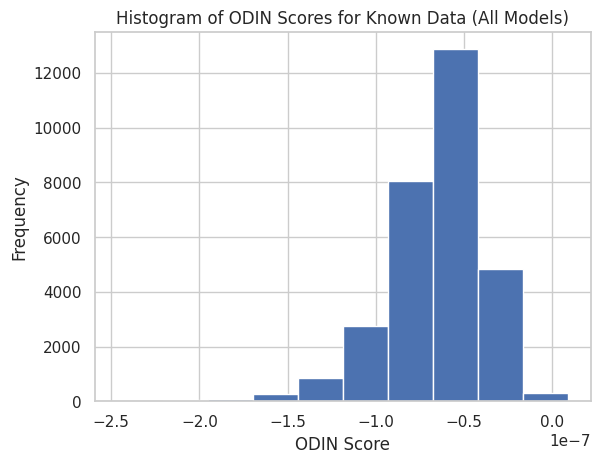

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

batch_size = 32
magnitude = 0.001
temperature = 1000
num_models = 20

loaded_models = [
    res_net01, res_net02, res_net03, res_net04, res_net05,
    res_net06, res_net07, res_net08, res_net09, res_net10,
    res_net11, res_net12, res_net13, res_net14, res_net15,
    res_net16, res_net17, res_net18, res_net19, res_net20
]

odin_scores_all_models = []

for i in range(num_models):
    logits_layer = loaded_models[i].layers[-2].output

    logits_model = tf.keras.Model(inputs=loaded_models[i].input, outputs=logits_layer)

    Known_data_X_test_as_tensor = tf.convert_to_tensor(Known_data_X_test)

    odin_scores_KNOWN = []

    for j in range(0, len(Known_data_X_test), batch_size):
        batch = Known_data_X_test_as_tensor[j:j+batch_size]

        with tf.device("/CPU:0"):
            logits = logits_model(batch)

        with tf.GradientTape() as tape:
            tape.watch(batch)
            logits = logits_model(batch)
        grads = tape.gradient(logits, batch)
        signed_grads = tf.sign(grads)

        perturbed_spectra = batch + magnitude * signed_grads

        with tf.device("/CPU:0"):
            perturbed_logits = logits_model(perturbed_spectra)

        scaled_perturbed_logits = perturbed_logits / temperature

        perturbed_softmax_output = tf.nn.softmax(scaled_perturbed_logits)

        max_perturbed_softmax_scores = tf.reduce_max(perturbed_softmax_output, axis=1)

        original_softmax_output = tf.nn.softmax(logits / temperature)
        max_softmax_scores = tf.reduce_max(original_softmax_output, axis=1)

        odin_scores_batch = max_softmax_scores - max_perturbed_softmax_scores

        odin_scores_KNOWN.extend(odin_scores_batch)

    odin_scores_KNOWN = np.array(odin_scores_KNOWN)
    odin_scores_all_models.append(odin_scores_KNOWN)

combined_odin_scores = np.concatenate(odin_scores_all_models)

plt.hist(combined_odin_scores, bins=10)
plt.xlabel('ODIN Score')
plt.ylabel('Frequency')
plt.title('Histogram of ODIN Scores for Known Data (All Models)')

plt.show()


In [ ]:
import os


folder_path = "/content/gdrive/MyDrive/Stanford_data"

file_name = "KNOWN_all_odin_scores_EOSp1p2p3.txt"

file_path = os.path.join(folder_path, file_name)

with open(file_path, 'w') as file:
    for score in combined_odin_scores:
        file.write(f"{score}\n")

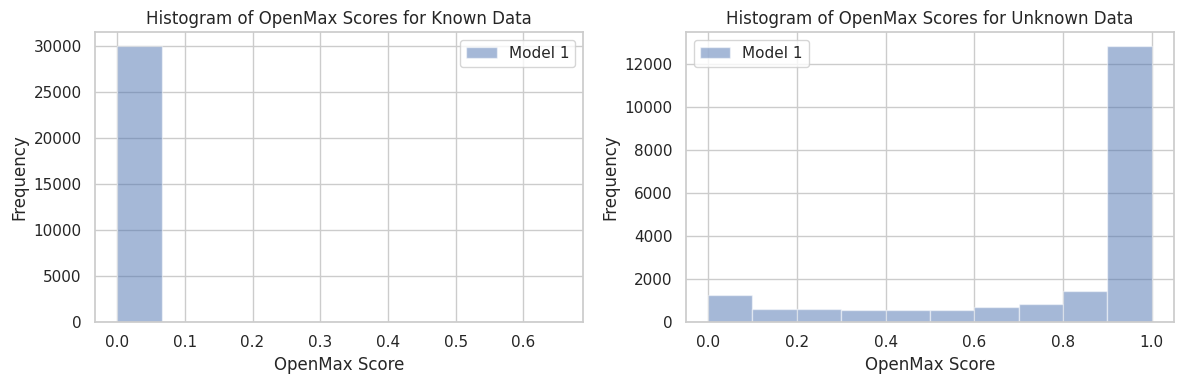

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

alpha = 1.0
num_models = 20

loaded_models = [res_net01, res_net02, res_net03, res_net04, res_net05, res_net06, res_net07, res_net08, res_net09, res_net10,
                 res_net11, res_net12, res_net13, res_net14, res_net15, res_net16, res_net17, res_net18, res_net19, res_net20]

openmax_scores_known = []
openmax_scores_unknown = []

Known_data_X_test_as_tensor = tf.convert_to_tensor(Known_data_X_test)
NeverSeen_data_X_test_as_tensor = tf.convert_to_tensor(NeverSeen_data_X_test)

for model in loaded_models:
    logits_layer = model.layers[-2].output

    logits_model = tf.keras.Model(inputs=model.input, outputs=logits_layer)

    known_logits = logits_model(Known_data_X_test_as_tensor)
    unknown_logits = logits_model(NeverSeen_data_X_test_as_tensor)

    max_known_logits = tf.reduce_max(known_logits, axis=1)
    max_unknown_logits = tf.reduce_max(unknown_logits, axis=1)

    scores_known = tf.exp(alpha * max_known_logits) / tf.reduce_sum(tf.exp(alpha * max_known_logits))

    scores_unknown = []
    for max_known, max_unknown in zip(max_known_logits, max_unknown_logits):
        unknown_score = tf.exp(alpha * max_known) / (tf.exp(alpha * max_known) + tf.exp(alpha * max_unknown))
        scores_unknown.append(unknown_score)

    openmax_scores_known.append(scores_known.numpy())
    openmax_scores_unknown.append(scores_unknown)

merged_openmax_scores_known = np.stack(openmax_scores_known, axis=1)
merged_openmax_scores_unknown = np.stack(openmax_scores_unknown, axis=1)

combined_openmax_scores_known = merged_openmax_scores_known.flatten()
combined_openmax_scores_unknown = merged_openmax_scores_unknown.flatten()



plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(combined_openmax_scores_known, bins=10, alpha=0.5, label=[f'Model {i+1}' for i in range(num_models)])
plt.xlabel('OpenMax Score')
plt.ylabel('Frequency')
plt.title('Histogram of OpenMax Scores for Known Data')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(combined_openmax_scores_unknown, bins=10, alpha=0.5, label=[f'Model {i+1}' for i in range(num_models)])
plt.xlabel('OpenMax Score')
plt.ylabel('Frequency')
plt.title('Histogram of OpenMax Scores for Unknown Data')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
np.savetxt('/content/gdrive/MyDrive/Stanford_data/EOSp1p2p3_combined_openmax_scores_known.txt', combined_openmax_scores_known)
np.savetxt('/content/gdrive/MyDrive/Stanford_data/EOSp1p2p3_combined_openmax_scores_unknown.txt', combined_openmax_scores_unknown)

In [ ]:
import numpy as np
from scipy.spatial import distance
import tensorflow as tf

def preprocess_data(data):
    preprocessed_data = data
    return preprocessed_data

def extract_deep_features(model, data):
    preprocessed_data = preprocess_data(data)
    deep_features = model.layers[-2].output
    deep_feature_model = tf.keras.Model(inputs=model.input, outputs=deep_features)
    extracted_features = deep_feature_model.predict(preprocessed_data)

    return extracted_features

deep_features_known = extract_deep_features(res_net01, Known_data_X_test)
deep_features_unknown = extract_deep_features(res_net01, NeverSeen_data_X_test)

mean_known = np.mean(deep_features_known, axis=0)
cov_known = np.cov(deep_features_known, rowvar=False)

cond_number = np.linalg.cond(cov_known)
print("Condition Number of Covariance Matrix (Known Data):", cond_number)

epsilon = 1e-6

if cond_number > 1 / epsilon:
    cov_known_reg = cov_known + epsilon * np.eye(cov_known.shape[0])
else:
    cov_known_reg = cov_known

mahalanobis_distances_known = []
for feature in deep_features_known:
    mahalanobis_distance = distance.mahalanobis(feature, mean_known, np.linalg.inv(cov_known_reg))
    mahalanobis_distances_known.append(mahalanobis_distance)

mahalanobis_distances_unknown = []
for feature in deep_features_unknown:
    mahalanobis_distance = distance.mahalanobis(feature, mean_known, np.linalg.inv(cov_known_reg))
    mahalanobis_distances_unknown.append(mahalanobis_distance)

threshold_known = 3.0
threshold_unknown = 4.0

ood_samples_known = [i for i, distance in enumerate(mahalanobis_distances_known) if distance > threshold_known]
ood_samples_unknown = [i for i, distance in enumerate(mahalanobis_distances_unknown) if distance > threshold_unknown]

print("Out-of-Distribution Sample Indices (Known Data):", ood_samples_known)
print("Out-of-Distribution Sample Indices (Unknown Data):", ood_samples_unknown)

32/32 [==============================] - 9s 242ms/step
Condition Number of Covariance Matrix (Known Data): 409397.22944377613
32/32 [==============================] - 7s 193ms/step
Condition Number of Covariance Matrix (Known Data): 578638.374792693
32/32 [==============================] - 7s 178ms/step
Condition Number of Covariance Matrix (Known Data): 1196892.9766923506
32/32 [==============================] - 7s 191ms/step
Condition Number of Covariance Matrix (Known Data): 333109.8613339717
32/32 [==============================] - 7s 191ms/step
Condition Number of Covariance Matrix (Known Data): 677097.7278220264
32/32 [==============================] - 7s 182ms/step
Condition Number of Covariance Matrix (Known Data): 370344.2453133325
32/32 [==============================] - 7s 197ms/step
Condition Number of Covariance Matrix (Known Data): 645383.176670031
32/32 [==============================] - 7s 188ms/step
Condition Number of Covariance Matrix (Known Data): 474963.8708805433


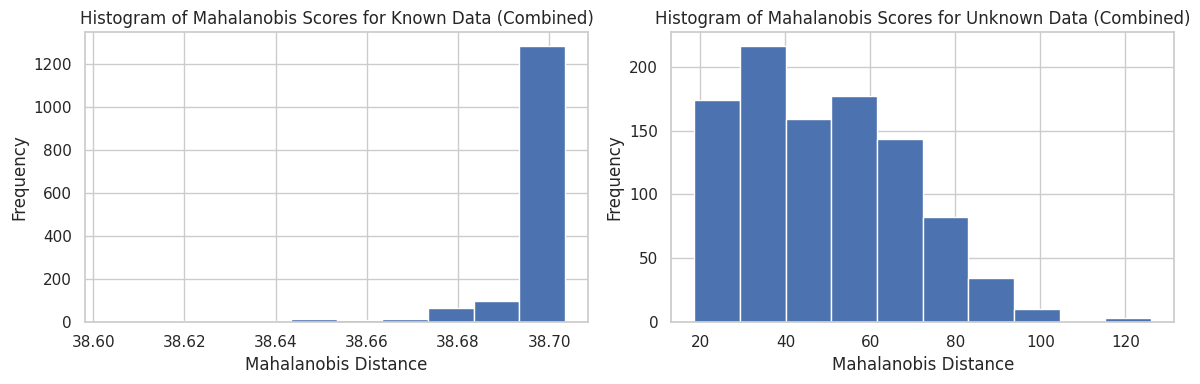

In [ ]:
import numpy as np
from scipy.spatial import distance
import tensorflow as tf
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def extract_deep_features(model, data):

    preprocessed_data = preprocess_data(data)

    deep_features = model.layers[-2].output
    deep_feature_model = tf.keras.Model(inputs=model.input, outputs=deep_features)
    extracted_features = deep_feature_model.predict(preprocessed_data)

    return extracted_features

def preprocess_data(data):
    preprocessed_data = data
    return preprocessed_data

loaded_models = [res_net01, res_net02, res_net03, res_net04, res_net05, res_net06, res_net07, res_net08, res_net09, res_net10,
                 res_net11, res_net12, res_net13, res_net14, res_net15, res_net16, res_net17, res_net18, res_net19, res_net20]

deep_features_known_all = []
mahalanobis_distances_known_all = []
deep_features_unknown_all = []
mahalanobis_distances_unknown_all = []

n_components = min(deep_features_known.shape[0], deep_features_known.shape[1]) - 1

for model in loaded_models:
    deep_features_known = extract_deep_features(model, Known_data_X_test)
    deep_features_unknown = extract_deep_features(model, NeverSeen_data_X_test)

    pca = PCA(n_components=n_components)
    deep_features_known_pca = pca.fit_transform(deep_features_known)
    deep_features_unknown_pca = pca.transform(deep_features_unknown)

    mean_known = np.mean(deep_features_known_pca, axis=0)
    cov_known = np.cov(deep_features_known_pca, rowvar=False)

    cond_number = np.linalg.cond(cov_known)
    print("Condition Number of Covariance Matrix (Known Data):", cond_number)

    epsilon = 1e-5

    if cond_number > 1 / epsilon:
        cov_known_reg = cov_known + epsilon * np.eye(cov_known.shape[0])
    else:
        cov_known_reg = cov_known

    mahalanobis_distances_known = []
    for feature in deep_features_known_pca:
        mahalanobis_distance = distance.mahalanobis(feature, mean_known, np.linalg.inv(cov_known_reg))
        mahalanobis_distances_known.append(mahalanobis_distance)

    mahalanobis_distances_unknown = []
    for feature in deep_features_unknown_pca:
        mahalanobis_distance = distance.mahalanobis(feature, mean_known, np.linalg.inv(cov_known_reg))
        mahalanobis_distances_unknown.append(mahalanobis_distance)

    deep_features_known_all.append(deep_features_known_pca)
    mahalanobis_distances_known_all.append(mahalanobis_distances_known)
    deep_features_unknown_all.append(deep_features_unknown_pca)
    mahalanobis_distances_unknown_all.append(mahalanobis_distances_unknown)

deep_features_known_combined = np.concatenate(deep_features_known_all, axis=-1)
mahalanobis_distances_known_combined = np.mean(mahalanobis_distances_known_all, axis=0)

deep_features_unknown_combined = np.concatenate(deep_features_unknown_all, axis=-1)
mahalanobis_distances_unknown_combined = np.mean(mahalanobis_distances_unknown_all, axis=0)

threshold_known = 3.0
threshold_unknown = 4.0

ood_samples_known = [i for i, distance in enumerate(mahalanobis_distances_known_combined) if distance > threshold_known]
ood_samples_unknown = [i for i, distance in enumerate(mahalanobis_distances_unknown_combined) if distance > threshold_unknown]

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(mahalanobis_distances_known_combined, bins=10)
plt.xlabel('Mahalanobis Distance')
plt.ylabel('Frequency')
plt.title('Histogram of Mahalanobis Scores for Known Data (Combined)')

plt.subplot(1, 2, 2)
plt.hist(mahalanobis_distances_unknown_combined, bins=10)
plt.xlabel('Mahalanobis Distance')
plt.ylabel('Frequency')
plt.title('Histogram of Mahalanobis Scores for Unknown Data (Combined)')

plt.tight_layout()
plt.show()


In [ ]:
np.savetxt(f'{folder_path}/mahalanobis_distances_known_combined_EOSp1p2p3.txt', mahalanobis_distances_known_combined)
np.savetxt(f'{folder_path}/mahalanobis_distances_unknown_combined_EOSp1p2p3.txt', mahalanobis_distances_unknown_combined)

# ODIN

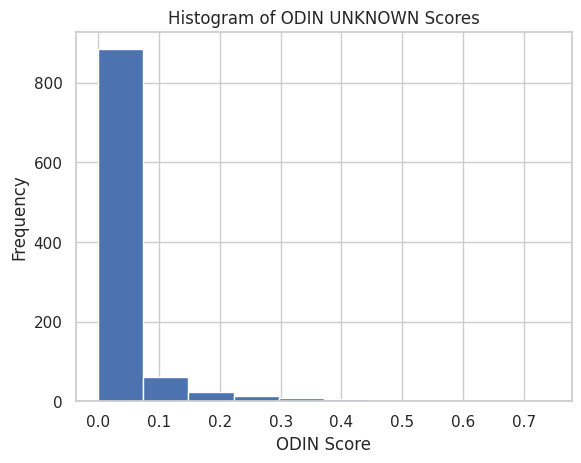

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

temperature = 1000
magnitude = 0.001

UN_Known_data_X_test_as_tensor = tf.convert_to_tensor(NeverSeen_data_X_test)

logits_layer = res_net01.layers[-2].output
logits_model = tf.keras.Model(inputs=res_net01.input, outputs=logits_layer)

odin_scores_UN_KNOWN = []

batch_size = 32

for i in range(0, len(NeverSeen_data_X_test), batch_size):
    batch = UN_Known_data_X_test_as_tensor[i:i+batch_size]

    with tf.device("/CPU:0"):
        logits = logits_model(batch)

    with tf.GradientTape() as tape:
        tape.watch(batch)
        output = logits_model(batch)
    grads = tape.gradient(output, batch)

    signed_grads = tf.sign(grads)

    perturbed_spectra = batch + magnitude * signed_grads

    with tf.device("/CPU:0"):
        perturbed_logits = logits_model(perturbed_spectra)

    scaled_perturbed_logits = perturbed_logits / temperature

    perturbed_softmax_output = tf.nn.softmax(scaled_perturbed_logits)

    max_perturbed_softmax_scores = tf.reduce_max(perturbed_softmax_output, axis=1)

    max_logits = tf.reduce_max(tf.nn.softmax(logits), axis=1)
    odin_scores_batch = max_logits - max_perturbed_softmax_scores

    odin_scores_UN_KNOWN.extend(odin_scores_batch)

odin_scores_UN_KNOWN = np.array(odin_scores_UN_KNOWN)

plt.hist(odin_scores_UN_KNOWN, bins=10)

plt.xlabel('ODIN Score')
plt.ylabel('Frequency')
plt.title('Histogram of ODIN UNKNOWN Scores')

plt.show()

In [ ]:
min(odin_scores_UN_KNOWN)

0.0002586446

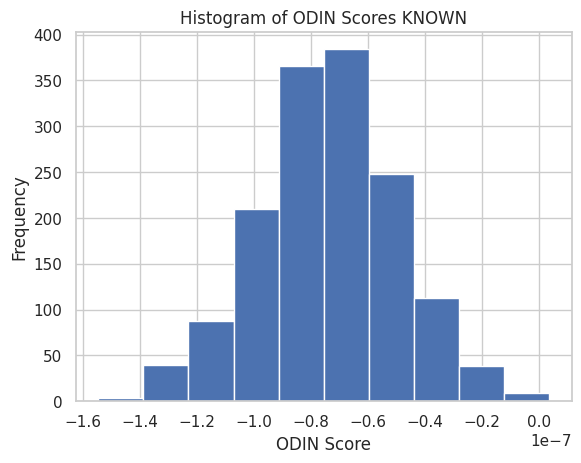

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

logits_layer = res_net01.layers[-2].output

logits_model = tf.keras.Model(inputs=res_net01.input, outputs=logits_layer)

Known_data_X_test_as_tensor = tf.convert_to_tensor(Known_data_X_test)

odin_scores_KNOWN = []

batch_size = 32

magnitude = 0.001

for i in range(0, len(Known_data_X_test), batch_size):
    batch = Known_data_X_test_as_tensor[i:i+batch_size]

    with tf.device("/CPU:0"):
        logits = logits_model(batch)

    with tf.GradientTape() as tape:
        tape.watch(batch)
        logits = logits_model(batch)
    grads = tape.gradient(logits, batch)

    signed_grads = tf.sign(grads)

    perturbed_spectra = batch + magnitude * signed_grads

    with tf.device("/CPU:0"):
        perturbed_logits = logits_model(perturbed_spectra)

    scaled_perturbed_logits = perturbed_logits / temperature

    perturbed_softmax_output = tf.nn.softmax(scaled_perturbed_logits)

    max_perturbed_softmax_scores = tf.reduce_max(perturbed_softmax_output, axis=1)

    original_softmax_output = tf.nn.softmax(logits / temperature)
    max_softmax_scores = tf.reduce_max(original_softmax_output, axis=1)

    odin_scores_batch = max_softmax_scores - max_perturbed_softmax_scores

    odin_scores_KNOWN.extend(odin_scores_batch)

odin_scores_KNOWN = np.array(odin_scores_KNOWN)

plt.hist(odin_scores_KNOWN, bins=10)

plt.xlabel('ODIN Score')
plt.ylabel('Frequency')
plt.title('Histogram of ODIN Scores KNOWN')

plt.show()

In [ ]:
max(odin_scores_KNOWN)

3.5797711e-09

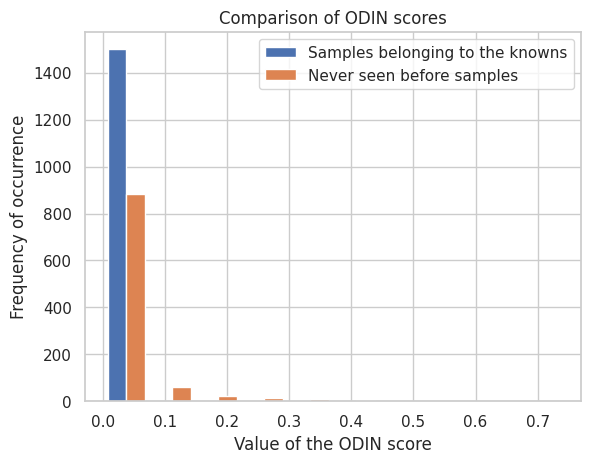

In [ ]:
plt.hist([odin_scores_KNOWN, odin_scores_UN_KNOWN], bins=10, label=['Samples belonging to the knowns', 'Never seen before samples'])  # Specify the number of bins and labels

plt.xlabel('Value of the ODIN score')
plt.ylabel('Frequency of occurrence')
plt.title('Comparison of ODIN scores')

plt.legend()

plt.show()

# OpenMax

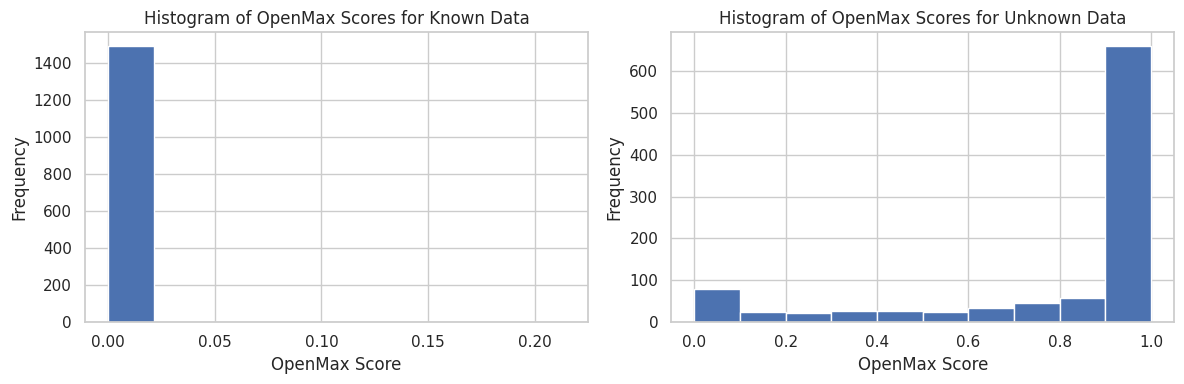

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

logits_layer = res_net01.layers[-2].output

logits_model = tf.keras.Model(inputs=res_net01.input, outputs=logits_layer)

Known_data_X_test_as_tensor = tf.convert_to_tensor(Known_data_X_test)
NeverSeen_data_X_test_as_tensor = tf.convert_to_tensor(NeverSeen_data_X_test)

known_logits = logits_model(Known_data_X_test_as_tensor)
unknown_logits = logits_model(NeverSeen_data_X_test_as_tensor)

max_known_logits = tf.reduce_max(known_logits, axis=1)
max_unknown_logits = tf.reduce_max(unknown_logits, axis=1)

def compute_openmax_scores_known(max_known_logits, alpha=1.0):
    scores_known = tf.exp(alpha * max_known_logits) / tf.reduce_sum(tf.exp(alpha * max_known_logits))
    return scores_known

openmax_scores_known = compute_openmax_scores_known(max_known_logits)

def compute_openmax_scores_unknown(max_known_logits, max_unknown_logits, alpha=1.0):
    scores_unknown = []
    for max_known, max_unknown in zip(max_known_logits, max_unknown_logits):
        unknown_score = tf.exp(alpha * max_known) / (tf.exp(alpha * max_known) + tf.exp(alpha * max_unknown))
        scores_unknown.append(unknown_score)
    return tf.stack(scores_unknown)

openmax_scores_unknown = compute_openmax_scores_unknown(max_known_logits, max_unknown_logits)

openmax_scores_known = openmax_scores_known.numpy()
openmax_scores_unknown = openmax_scores_unknown.numpy()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(openmax_scores_known, bins=10)
plt.xlabel('OpenMax Score')
plt.ylabel('Frequency')
plt.title('Histogram of OpenMax Scores for Known Data')

plt.subplot(1, 2, 2)
plt.hist(openmax_scores_unknown, bins=10)
plt.xlabel('OpenMax Score')
plt.ylabel('Frequency')
plt.title('Histogram of OpenMax Scores for Unknown Data')

plt.tight_layout()
plt.show()

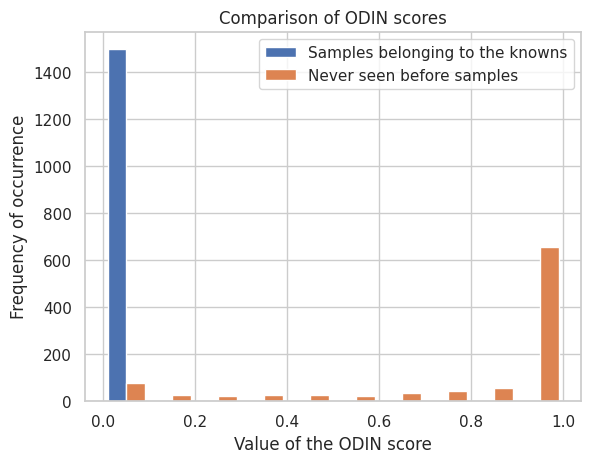

In [ ]:
plt.hist([openmax_scores_known, openmax_scores_unknown], bins=10, label=['Samples belonging to the knowns', 'Never seen before samples'])  # Specify the number of bins and labels

plt.xlabel('Value of the ODIN score')
plt.ylabel('Frequency of occurrence')
plt.title('Comparison of ODIN scores')

plt.legend()

plt.show()

In [ ]:
max(openmax_scores_known)

0.21407755

In [ ]:
min(openmax_scores_unknown)

0.00020541981

In [ ]:
import numpy as np

openmax_scores_known_sorted = np.sort(openmax_scores_known)
openmax_scores_unknown_sorted = np.sort(openmax_scores_unknown)

min_known_score = openmax_scores_known_sorted.min()
max_known_score = openmax_scores_known_sorted.max()
min_unknown_score = openmax_scores_unknown_sorted.min()
max_unknown_score = openmax_scores_unknown_sorted.max()

bins = np.linspace(min(min_known_score, min_unknown_score), max(max_known_score, max_unknown_score), 1000)

hist_known, _ = np.histogram(openmax_scores_known_sorted, bins)
hist_unknown, _ = np.histogram(openmax_scores_unknown_sorted, bins)

intersection = np.minimum(hist_known, hist_unknown)
union = np.maximum(hist_known, hist_unknown)

iou = np.sum(intersection) / np.sum(union) * 100

print(f"Overlap (IoU): {iou:.2f}%")

Overlap (IoU): 0.93%


# Mahalanobis

In [ ]:
import numpy as np
import tensorflow as tf
from scipy.spatial import distance
from sklearn.decomposition import PCA

batch_size = 32

def extract_batched_deep_features(model, data_batch):
    with tf.device('/device:GPU:0'):
        extracted_features = model.predict(data_batch)
    return extracted_features

def compute_mahalanobis_distances(features, mean, cov_reg):
    distances = []
    for feature in features:
        mahalanobis_distance = distance.mahalanobis(feature, mean, np.linalg.inv(cov_reg))
        distances.append(mahalanobis_distance)
    return distances

def reduce_dimensionality(features, n_components):
    pca = PCA(n_components=n_components)
    reduced_features = pca.fit_transform(features)
    return reduced_features, pca

deep_features_known = []
deep_features_unknown = []

for i in range(0, len(Known_data_X_test), batch_size):
    batch_known = extract_batched_deep_features(res_net01, Known_data_X_test[i:i+batch_size])
    batch_unknown = extract_batched_deep_features(res_net01, NeverSeen_data_X_test[i:i+batch_size])

    deep_features_known.extend(batch_known)
    deep_features_unknown.extend(batch_unknown)

n_components = 100

reduced_features_known, pca_known = reduce_dimensionality(deep_features_known, n_components)
reduced_features_unknown, pca_unknown = reduce_dimensionality(deep_features_unknown, n_components)

mean_known = np.mean(reduced_features_known, axis=0)
cov_known = np.cov(reduced_features_known, rowvar=False)

cond_number = np.linalg.cond(cov_known)
print("Condition Number of Covariance Matrix (Known Data):", cond_number)

epsilon = 1e-6

if cond_number > 1 / epsilon:
    cov_known_reg = cov_known + epsilon * np.eye(cov_known.shape[0])
else:
    cov_known_reg = cov_known

mahalanobis_distances_known = []
mahalanobis_distances_unknown = []

for i in range(0, len(reduced_features_known), batch_size):
    batch_distances_known = compute_mahalanobis_distances(reduced_features_known[i:i+batch_size], mean_known, cov_known_reg)
    batch_distances_unknown = compute_mahalanobis_distances(reduced_features_unknown[i:i+batch_size], mean_known, cov_known_reg)

    mahalanobis_distances_known.extend(batch_distances_known)
    mahalanobis_distances_unknown.extend(batch_distances_unknown)

threshold_known = 3.0
threshold_unknown = 4.0

ood_samples_known = [i for i, distance in enumerate(mahalanobis_distances_known) if distance > threshold_known]
ood_samples_unknown = [i for i, distance in enumerate(mahalanobis_distances_unknown) if distance > threshold_unknown]

print("Out-of-Distribution Sample Indices (Known Data):", ood_samples_known)
print("Out-of-Distribution Sample Indices (Unknown Data):", ood_samples_unknown)

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(mahalanobis_distances_known, bins=10)
plt.xlabel('OpenMax Score')
plt.ylabel('Frequency')
plt.title('Histogram of OpenMax Scores for Known Data')

plt.subplot(1, 2, 2)
plt.hist(mahalanobis_distances_unknown, bins=10)
plt.xlabel('OpenMax Score')
plt.ylabel('Frequency')
plt.title('Histogram of OpenMax Scores for Unknown Data')

plt.tight_layout()
plt.show()

In [ ]:
plt.hist([mahalanobis_distances_known, mahalanobis_distances_unknown], bins=100, label=['Samples belonging to the knowns', 'Never seen before samples'])  # Specify the number of bins and labels
plt.xlim(2.5, 20)

plt.xlabel('Value of the ODIN score')
plt.ylabel('Frequency of occurrence')
plt.title('Comparison of ODIN scores')

plt.legend()

plt.show()

In [ ]:
import numpy as np

mahalanobis_scores_known_sorted = np.sort(mahalanobis_distances_known)
mahalanobis_scores_unknown_sorted = np.sort(mahalanobis_distances_unknown)

min_known_score = mahalanobis_scores_known_sorted.min()
max_known_score = mahalanobis_scores_known_sorted.max()
min_unknown_score = mahalanobis_scores_unknown_sorted.min()
max_unknown_score = mahalanobis_scores_unknown_sorted.max()

bins = np.linspace(min(min_known_score, min_unknown_score), max(max_known_score, max_unknown_score), 1000)

hist_known, _ = np.histogram(mahalanobis_scores_known_sorted, bins)
hist_unknown, _ = np.histogram(mahalanobis_scores_unknown_sorted, bins)

intersection = np.minimum(hist_known, hist_unknown)
union = np.maximum(hist_known, hist_unknown)

iou = np.sum(intersection) / np.sum(union) * 100

print(f"Overlap (IoU): {iou:.2f}%")

# Separating $\mathcal{K}$ and $\mathcal{N}$ by a fixed (class-independendent) threshold

In [ ]:
prediction_known = prediction_known_ensemble_2
prediction_unknown = prediction_unknown_ensemble_2

In [ ]:
def thresholding(threshold):
  true = 0
  for i in range(prediction_known.shape[0]):
    if prediction_known.argmax(axis=1)[i] == Known_data_X_test_label_int[i] and max(prediction_known[i]) > threshold:
      true += 1
  return true/(prediction_known.shape[0])

In [ ]:
CorrectThresholding = []
for i in range(90):
  CorrectThresholding.append([0.1 + 0.01*i,100*thresholding(0.1 + 0.01*i)])
for i in range(10):
  CorrectThresholding.append([0.99 + 0.001*i,100*thresholding(0.99 + 0.001*i)])
CorrectThresholding

[[0.1, 90.73333333333333],
 [0.11, 90.66666666666666],
 [0.12000000000000001, 90.66666666666666],
 [0.13, 90.60000000000001],
 [0.14, 90.53333333333333],
 [0.15000000000000002, 90.53333333333333],
 [0.16, 90.53333333333333],
 [0.17, 90.46666666666667],
 [0.18, 90.4],
 [0.19, 90.33333333333333],
 [0.2, 90.33333333333333],
 [0.21000000000000002, 90.33333333333333],
 [0.22, 90.33333333333333],
 [0.23, 90.33333333333333],
 [0.24000000000000002, 90.2],
 [0.25, 90.13333333333333],
 [0.26, 90.06666666666666],
 [0.27, 90.0],
 [0.28, 89.86666666666666],
 [0.29000000000000004, 89.53333333333333],
 [0.30000000000000004, 89.53333333333333],
 [0.31, 89.46666666666667],
 [0.32, 89.33333333333333],
 [0.33, 89.13333333333333],
 [0.33999999999999997, 89.06666666666668],
 [0.35, 88.86666666666667],
 [0.36, 88.8],
 [0.37, 88.66666666666667],
 [0.38, 88.66666666666667],
 [0.39, 88.46666666666667],
 [0.4, 88.33333333333333],
 [0.41000000000000003, 88.2],
 [0.42000000000000004, 88.13333333333333],
 [0.43000

In [ ]:
def false_identify(threshold):
  false_identify = 0
  for i in range(prediction_known.shape[0]):
    if prediction_known.argmax(axis=1)[i] != Known_data_X_test_label_int[i] and max(prediction_known[i]) > threshold:
      false_identify += 1
  return false_identify/(prediction_known.shape[0])

In [ ]:
FalseIdentify = []
for i in range(90):
  FalseIdentify.append([0.1 + 0.01*i,100*false_identify(0.1 + 0.01*i)])
for i in range(10):
  FalseIdentify.append([0.99 + 0.001*i,100*false_identify(0.99 + 0.001*i)])
FalseIdentify

[[0.1, 9.2],
 [0.11, 9.133333333333333],
 [0.12000000000000001, 9.133333333333333],
 [0.13, 9.066666666666666],
 [0.14, 9.066666666666666],
 [0.15000000000000002, 8.866666666666667],
 [0.16, 8.866666666666667],
 [0.17, 8.866666666666667],
 [0.18, 8.799999999999999],
 [0.19, 8.799999999999999],
 [0.2, 8.799999999999999],
 [0.21000000000000002, 8.733333333333333],
 [0.22, 8.666666666666668],
 [0.23, 8.6],
 [0.24000000000000002, 8.6],
 [0.25, 8.6],
 [0.26, 8.6],
 [0.27, 8.6],
 [0.28, 8.466666666666667],
 [0.29000000000000004, 8.4],
 [0.30000000000000004, 8.4],
 [0.31, 8.4],
 [0.32, 8.4],
 [0.33, 8.4],
 [0.33999999999999997, 8.333333333333332],
 [0.35, 8.333333333333332],
 [0.36, 8.266666666666666],
 [0.37, 8.133333333333333],
 [0.38, 8.133333333333333],
 [0.39, 7.933333333333334],
 [0.4, 7.866666666666666],
 [0.41000000000000003, 7.733333333333333],
 [0.42000000000000004, 7.466666666666668],
 [0.43000000000000005, 7.333333333333333],
 [0.44000000000000006, 7.133333333333333],
 [0.45000000

In [ ]:
def misclassifyunknown(threshold):
  misclassifyunknown = 0
  for i in range(prediction_unknown.shape[0]):
    if max(prediction_unknown[i]) > threshold:
      misclassifyunknown += 1
  return misclassifyunknown/(prediction_unknown.shape[0])

In [ ]:
UnknownMisclassify = []
for i in range(90):
  UnknownMisclassify.append([0.1 + 0.01*i,100*misclassifyunknown(0.1 + 0.01*i)])
for i in range(10):
  UnknownMisclassify.append([0.99 + 0.001*i,100*misclassifyunknown(0.99 + 0.001*i)])
UnknownMisclassify

[[0.1, 96.3],
 [0.11, 91.5],
 [0.12000000000000001, 86.3],
 [0.13, 83.6],
 [0.14, 80.5],
 [0.15000000000000002, 78.60000000000001],
 [0.16, 77.7],
 [0.17, 75.8],
 [0.18, 74.3],
 [0.19, 73.3],
 [0.2, 72.7],
 [0.21000000000000002, 71.39999999999999],
 [0.22, 70.1],
 [0.23, 69.1],
 [0.24000000000000002, 67.9],
 [0.25, 67.10000000000001],
 [0.26, 66.3],
 [0.27, 65.3],
 [0.28, 65.0],
 [0.29000000000000004, 64.3],
 [0.30000000000000004, 63.1],
 [0.31, 62.0],
 [0.32, 61.5],
 [0.33, 60.9],
 [0.33999999999999997, 60.099999999999994],
 [0.35, 58.9],
 [0.36, 58.3],
 [0.37, 57.599999999999994],
 [0.38, 57.099999999999994],
 [0.39, 56.39999999999999],
 [0.4, 55.900000000000006],
 [0.41000000000000003, 55.50000000000001],
 [0.42000000000000004, 54.800000000000004],
 [0.43000000000000005, 53.900000000000006],
 [0.44000000000000006, 53.5],
 [0.45000000000000007, 53.1],
 [0.45999999999999996, 52.800000000000004],
 [0.47, 51.300000000000004],
 [0.48, 50.8],
 [0.49, 50.2],
 [0.5, 49.5],
 [0.51, 48.6],
 [

In [ ]:
def dontknow(threshold):
  notknown = 0
  for i in range(prediction_known.shape[0]):
    if max(prediction_known[i]) <= threshold:
      notknown += 1
  return notknown/(prediction_known.shape[0])

In [ ]:
DontKnowThresholding = []
for i in range(90):
  DontKnowThresholding.append([0.1 + 0.01*i,100*dontknow(0.1 + 0.01*i)])
for i in range(10):
  DontKnowThresholding.append([0.99 + 0.001*i,100*dontknow(0.99 + 0.001*i)])
DontKnowThresholding

[[0.1, 0.06666666666666667],
 [0.11, 0.2],
 [0.12000000000000001, 0.2],
 [0.13, 0.33333333333333337],
 [0.14, 0.4],
 [0.15000000000000002, 0.6],
 [0.16, 0.6],
 [0.17, 0.6666666666666667],
 [0.18, 0.8],
 [0.19, 0.8666666666666666],
 [0.2, 0.8666666666666666],
 [0.21000000000000002, 0.9333333333333335],
 [0.22, 1.0],
 [0.23, 1.0666666666666667],
 [0.24000000000000002, 1.2],
 [0.25, 1.2666666666666666],
 [0.26, 1.3333333333333335],
 [0.27, 1.4000000000000001],
 [0.28, 1.6666666666666667],
 [0.29000000000000004, 2.0666666666666664],
 [0.30000000000000004, 2.0666666666666664],
 [0.31, 2.1333333333333333],
 [0.32, 2.2666666666666666],
 [0.33, 2.466666666666667],
 [0.33999999999999997, 2.6],
 [0.35, 2.8000000000000003],
 [0.36, 2.933333333333333],
 [0.37, 3.2],
 [0.38, 3.2],
 [0.39, 3.5999999999999996],
 [0.4, 3.8],
 [0.41000000000000003, 4.066666666666666],
 [0.42000000000000004, 4.3999999999999995],
 [0.43000000000000005, 4.6],
 [0.44000000000000006, 4.866666666666666],
 [0.4500000000000000

In [ ]:
aligned_array = [element for row in prediction_unknown for element in row]
# Find the maximum value in the aligned array
max_value = max(aligned_array)

# The max_value variable now contains the maximum value in the aligned array
print("The maximum value in the aligned array is:", max_value)


The maximum value in the aligned array is: 0.9999955


In [ ]:
thresholding(max_value)

0.09

In [ ]:
dontknow(max_value)

0.91

In [ ]:
misclassifyunknown(max_value)

0.0

In [ ]:
false_identify(max_value)

0.0

In [ ]:
DontKnowThresholdingANOTHER = []

for i in range(89):
  DontKnowThresholdingANOTHER.append([100*thresholding(0.1 + 0.01*i),100*dontknow(0.1 + 0.01*i),])

for i in range(10):
  DontKnowThresholdingANOTHER.append([100*thresholding(0.99 + 0.001*i),100*dontknow(0.99 + 0.001*i),])

for i in range(10):
  DontKnowThresholdingANOTHER.append([100*thresholding(0.999 + 0.0001*i),100*dontknow(0.999 + 0.0001*i),])

for i in range(10):
  DontKnowThresholdingANOTHER.append([100*thresholding(0.9999 + 0.00001*i),100*dontknow(0.9999 + 0.00001*i),])

for i in range(10):
  DontKnowThresholdingANOTHER.append([100*thresholding(0.99999 + 0.000001*i),100*dontknow(0.99999 + 0.000001*i),])

for i in range(10):
  DontKnowThresholdingANOTHER.append([100*thresholding(0.999999 + 0.0000001*i),100*dontknow(0.999999 + 0.0000001*i),])

for i in range(9):
  DontKnowThresholdingANOTHER.append([100*thresholding(0.9999999 + 0.00000001*i),100*dontknow(0.9999999 + 0.00000001*i),])

DontKnowThresholdingANOTHER.append([100*thresholding(max_value),100*dontknow(max_value)])

DontKnowThresholdingANOTHER

[[90.73333333333333, 0.06666666666666667],
 [90.66666666666666, 0.2],
 [90.66666666666666, 0.2],
 [90.60000000000001, 0.33333333333333337],
 [90.53333333333333, 0.4],
 [90.53333333333333, 0.6],
 [90.53333333333333, 0.6],
 [90.46666666666667, 0.6666666666666667],
 [90.4, 0.8],
 [90.33333333333333, 0.8666666666666666],
 [90.33333333333333, 0.8666666666666666],
 [90.33333333333333, 0.9333333333333335],
 [90.33333333333333, 1.0],
 [90.33333333333333, 1.0666666666666667],
 [90.2, 1.2],
 [90.13333333333333, 1.2666666666666666],
 [90.06666666666666, 1.3333333333333335],
 [90.0, 1.4000000000000001],
 [89.86666666666666, 1.6666666666666667],
 [89.53333333333333, 2.0666666666666664],
 [89.53333333333333, 2.0666666666666664],
 [89.46666666666667, 2.1333333333333333],
 [89.33333333333333, 2.2666666666666666],
 [89.13333333333333, 2.466666666666667],
 [89.06666666666668, 2.6],
 [88.86666666666667, 2.8000000000000003],
 [88.8, 2.933333333333333],
 [88.66666666666667, 3.2],
 [88.66666666666667, 3.2],

In [ ]:
UnknownMisclassifyANOTHER = []
for i in range(89):
  UnknownMisclassifyANOTHER.append([100*thresholding(0.1 + 0.01*i),100*misclassifyunknown(0.1 + 0.01*i),])
for i in range(10):
  UnknownMisclassifyANOTHER.append([100*thresholding(0.99 + 0.001*i),100*misclassifyunknown(0.99 + 0.001*i),])

for i in range(10):
  UnknownMisclassifyANOTHER.append([100*thresholding(0.999 + 0.0001*i),100*misclassifyunknown(0.999 + 0.0001*i),])

for i in range(10):
  UnknownMisclassifyANOTHER.append([100*thresholding(0.9999 + 0.00001*i),100*misclassifyunknown(0.9999 + 0.00001*i),])

for i in range(10):
  UnknownMisclassifyANOTHER.append([100*thresholding(0.99999 + 0.000001*i),100*misclassifyunknown(0.99999 + 0.000001*i),])

for i in range(10):
  UnknownMisclassifyANOTHER.append([100*thresholding(0.999999 + 0.0000001*i),100*misclassifyunknown(0.999999 + 0.0000001*i),])

for i in range(9):
  UnknownMisclassifyANOTHER.append([100*thresholding(0.9999999 + 0.00000001*i),100*misclassifyunknown(0.9999999 + 0.00000001*i),])

UnknownMisclassifyANOTHER.append([100*thresholding(max_value),100*misclassifyunknown(max_value),])

UnknownMisclassifyANOTHER

[[90.73333333333333, 96.3],
 [90.66666666666666, 91.5],
 [90.66666666666666, 86.3],
 [90.60000000000001, 83.6],
 [90.53333333333333, 80.5],
 [90.53333333333333, 78.60000000000001],
 [90.53333333333333, 77.7],
 [90.46666666666667, 75.8],
 [90.4, 74.3],
 [90.33333333333333, 73.3],
 [90.33333333333333, 72.7],
 [90.33333333333333, 71.39999999999999],
 [90.33333333333333, 70.1],
 [90.33333333333333, 69.1],
 [90.2, 67.9],
 [90.13333333333333, 67.10000000000001],
 [90.06666666666666, 66.3],
 [90.0, 65.3],
 [89.86666666666666, 65.0],
 [89.53333333333333, 64.3],
 [89.53333333333333, 63.1],
 [89.46666666666667, 62.0],
 [89.33333333333333, 61.5],
 [89.13333333333333, 60.9],
 [89.06666666666668, 60.099999999999994],
 [88.86666666666667, 58.9],
 [88.8, 58.3],
 [88.66666666666667, 57.599999999999994],
 [88.66666666666667, 57.099999999999994],
 [88.46666666666667, 56.39999999999999],
 [88.33333333333333, 55.900000000000006],
 [88.2, 55.50000000000001],
 [88.13333333333333, 54.800000000000004],
 [88.0

In [ ]:
FalseIdentifyANOTHER = []
for i in range(89):
  FalseIdentifyANOTHER.append([100*thresholding(0.1 + 0.01*i),100*false_identify(0.1 + 0.01*i),])
for i in range(10):
  FalseIdentifyANOTHER.append([100*thresholding(0.99 + 0.001*i),100*false_identify(0.99 + 0.001*i)])

for i in range(10):
  FalseIdentifyANOTHER.append([100*thresholding(0.999 + 0.0001*i),100*false_identify(0.999 + 0.0001*i),])

for i in range(10):
  FalseIdentifyANOTHER.append([100*thresholding(0.9999 + 0.00001*i),100*false_identify(0.9999 + 0.00001*i),])

for i in range(10):
  FalseIdentifyANOTHER.append([100*thresholding(0.99999 + 0.000001*i),100*false_identify(0.99999 + 0.000001*i),])

for i in range(10):
  FalseIdentifyANOTHER.append([100*thresholding(0.999999 + 0.0000001*i),100*false_identify(0.999999 + 0.0000001*i),])

for i in range(9):
  FalseIdentifyANOTHER.append([100*thresholding(0.9999999 + 0.00000001*i),100*false_identify(0.9999999 + 0.00000001*i),])

FalseIdentifyANOTHER.append([100*thresholding(max_value),100*false_identify(max_value),])
FalseIdentifyANOTHER

[[90.73333333333333, 9.2],
 [90.66666666666666, 9.133333333333333],
 [90.66666666666666, 9.133333333333333],
 [90.60000000000001, 9.066666666666666],
 [90.53333333333333, 9.066666666666666],
 [90.53333333333333, 8.866666666666667],
 [90.53333333333333, 8.866666666666667],
 [90.46666666666667, 8.866666666666667],
 [90.4, 8.799999999999999],
 [90.33333333333333, 8.799999999999999],
 [90.33333333333333, 8.799999999999999],
 [90.33333333333333, 8.733333333333333],
 [90.33333333333333, 8.666666666666668],
 [90.33333333333333, 8.6],
 [90.2, 8.6],
 [90.13333333333333, 8.6],
 [90.06666666666666, 8.6],
 [90.0, 8.6],
 [89.86666666666666, 8.466666666666667],
 [89.53333333333333, 8.4],
 [89.53333333333333, 8.4],
 [89.46666666666667, 8.4],
 [89.33333333333333, 8.4],
 [89.13333333333333, 8.4],
 [89.06666666666668, 8.333333333333332],
 [88.86666666666667, 8.333333333333332],
 [88.8, 8.266666666666666],
 [88.66666666666667, 8.133333333333333],
 [88.66666666666667, 8.133333333333333],
 [88.466666666666

# Class-adaptive threshold

# Run #1

In [ ]:
prediction_known = prediction_known_ensemble_1
prediction_unknown = prediction_unknown_ensemble_1

In [ ]:
ThresholdNeverSeenBefores = []
for i in range(15):
  ThresholdNeverSeenBefores.append(np.max(prediction_unknown[:,i]))

In [ ]:
C_count0 = 0
for i in range(100):
  if prediction_known[i,0] > ThresholdNeverSeenBefores[0] and np.argmax(prediction_known[i]) == 0:
    C_count0 += 1
  else:
    C_count0 += 0
C_count0

2

In [ ]:
mistake0 = 0
for i in range(100):
  if np.argmax(prediction_known[i]) != 0 and max(prediction_known[i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[i])]:
    mistake0 += 1
    print(i)
  else:
    mistake0 += 0
mistake0
print("Number of mistakes in this class:",mistake0)

Number of mistakes in this class: 0


In [ ]:
C_count1 = 0
for i in range(100):
  if prediction_known[100 + i,1] > ThresholdNeverSeenBefores[1] and np.argmax(prediction_known[100 + i]) == 1:
    C_count1 += 1
  else:
    C_count1 += 0
C_count1

74

In [ ]:
mistake1 = 0
for i in range(100):
  if np.argmax(prediction_known[100 + i]) != 1 and max(prediction_known[100 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[100 + i])]:
    mistake1 += 1
    print(100 + i)
  else:
    mistake1 += 0
mistake1
print("Number of mistakes in this class:",mistake1)

144
Number of mistakes in this class: 1


In [ ]:
ThresholdNeverSeenBefores[np.argmax(prediction_known[144])] = max(prediction_known[144])

In [ ]:
mistake1 = 0
for i in range(100):
  if np.argmax(prediction_known[100 + i]) != 1 and max(prediction_known[100 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[100 + i])]:
    mistake1 += 1
    print(100 + i)
  else:
    mistake1 += 0
mistake1
print("Number of mistakes in this class:",mistake1)

Number of mistakes in this class: 0


In [ ]:
C_count2 = 0
for i in range(100):
  if prediction_known[200 + i,2] > ThresholdNeverSeenBefores[2] and np.argmax(prediction_known[200 + i]) == 2:
    C_count2 += 1
  else:
    C_count2 += 0
C_count2

10

In [ ]:
mistake2 = 0
for i in range(100):
  if np.argmax(prediction_known[200 + i]) != 2 and max(prediction_known[200 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[200 + i])]:
    mistake2 += 1
    print(200 + i)
  else:
    mistake2 += 0
mistake2
print("Number of mistakes in this class:",mistake2)

Number of mistakes in this class: 0


In [ ]:
C_count3 = 0
for i in range(100):
  if prediction_known[300 + i,3] > ThresholdNeverSeenBefores[3] and np.argmax(prediction_known[300 + i]) == 3:
    C_count3 += 1
  else:
    C_count3 += 0
C_count3

92

In [ ]:
mistake3 = 0
for i in range(100):
  if np.argmax(prediction_known[300 + i]) != 3 and max(prediction_known[300 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[300 + i])]:
    mistake3 += 1
    print(300 + i)
  else:
    mistake3 += 0
mistake3
print("Number of mistakes in this class:",mistake3)

Number of mistakes in this class: 0


In [ ]:
C_count4 = 0
for i in range(100):
  if prediction_known[400 + i,4] > ThresholdNeverSeenBefores[4] and np.argmax(prediction_known[400 + i]) == 4:
    C_count4 += 1
  else:
    C_count4 += 0
C_count4

100

In [ ]:
mistake4 = 0
for i in range(100):
  if np.argmax(prediction_known[400 + i]) != 4 and max(prediction_known[400 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[400 + i])]:
    mistake4 += 1
    print(400 + i)
  else:
    mistake4 += 0
print("Number of mistakes in this class:",mistake4)

Number of mistakes in this class: 0


In [ ]:
C_count5 = 0
for i in range(100):
  if prediction_known[500 + i,5] > ThresholdNeverSeenBefores[5] and np.argmax(prediction_known[500 + i]) == 5:
    C_count5 += 1
  else:
    C_count5 += 0
C_count5

85

In [ ]:
mistake5 = 0
for i in range(100):
  if np.argmax(prediction_known[500 + i]) != 5 and max(prediction_known[500 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[500 + i])]:
    mistake5 += 1
    print(500 + i)
  else:
    mistake5 += 0
print("Number of mistakes in this class:",mistake5)

501
510
515
524
526
532
533
535
540
553
559
560
566
570
572
Number of mistakes in this class: 15


In [ ]:
ThresholdNeverSeenBefores[np.argmax(prediction_known[559])] = max(prediction_known[559])

In [ ]:
mistake5 = 0
for i in range(100):
  if np.argmax(prediction_known[500 + i]) != 5 and max(prediction_known[500 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[500 + i])]:
    mistake5 += 1
    print(500 + i)
  else:
    mistake5 += 0
print("Number of mistakes in this class:",mistake5)

Number of mistakes in this class: 0


In [ ]:
C_count6 = 0
for i in range(100):
  if prediction_known[600 + i,6] > ThresholdNeverSeenBefores[6] and np.argmax(prediction_known[600 + i]) == 6:
    C_count6 += 1
  else:
    C_count6 += 0
C_count6

70

In [ ]:
mistake6 = 0
for i in range(100):
  if np.argmax(prediction_known[600 + i]) != 6 and max(prediction_known[600 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[600 + i])]:
    mistake6 += 1
    print(600 + i)
  else:
    mistake6 += 0
print("Number of mistakes in this class:",mistake6)

607
609
610
639
648
658
668
670
688
696
Number of mistakes in this class: 10


In [ ]:
ThresholdNeverSeenBefores[np.argmax(prediction_known[658])] = max(prediction_known[658])

In [ ]:
mistake6 = 0
for i in range(100):
  if np.argmax(prediction_known[600 + i]) != 6 and max(prediction_known[600 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[600 + i])]:
    mistake6 += 1
    print(600 + i)
  else:
    mistake6 += 0
print("Number of mistakes in this class:",mistake6)

Number of mistakes in this class: 0


In [ ]:
C_count7 = 0
for i in range(100):
  if prediction_known[700 + i,7] > ThresholdNeverSeenBefores[7]  and np.argmax(prediction_known[700 + i]) == 7:
    C_count7 += 1
  else:
    C_count7 += 0
C_count7

64

In [ ]:
mistake7 = 0
for i in range(100):
  if np.argmax(prediction_known[700 + i]) != 7 and max(prediction_known[700 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[700 + i])]:
    mistake7 += 1
    print(700 + i)
  else:
    mistake7 += 0
print("Number of mistakes in this class:",mistake7)

795
Number of mistakes in this class: 1


In [ ]:
ThresholdNeverSeenBefores[np.argmax(prediction_known[795])] = max(prediction_known[795])

In [ ]:
mistake7 = 0
for i in range(100):
  if np.argmax(prediction_known[700 + i]) != 7 and max(prediction_known[700 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[700 + i])]:
    mistake7 += 1
    print(700 + i)
  else:
    mistake7 += 0
print("Number of mistakes in this class:",mistake7)

Number of mistakes in this class: 0


In [ ]:
C_count8 = 0
for i in range(100):
  if prediction_known[800 + i,8] > ThresholdNeverSeenBefores[8] and np.argmax(prediction_known[800 + i]) == 8:
    C_count8 += 1
  else:
    C_count8 += 0
C_count8

82

In [ ]:
mistake8 = 0
for i in range(100):
  if np.argmax(prediction_known[800 + i]) != 8 and max(prediction_known[800 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[800 + i])]:
    mistake8 += 1
    print(800 + i)
  else:
    mistake8 += 0
print("Number of mistakes in this class:",mistake8)

Number of mistakes in this class: 0


In [ ]:
C_count9 = 0
for i in range(100):
  if prediction_known[900 + i,9] > ThresholdNeverSeenBefores[9] and np.argmax(prediction_known[900 + i]) == 9:
    C_count9 += 1
  else:
    C_count9 += 0
C_count9

3

In [ ]:
mistake9 = 0
for i in range(100):
  if np.argmax(prediction_known[900 + i]) != 9 and max(prediction_known[900 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[900 + i])]:
    mistake9 += 1
    print(900 + i)
  else:
    mistake9 += 0
print("Number of mistakes in this class:",mistake9)

Number of mistakes in this class: 0


In [ ]:
C_count10 = 0
for i in range(100):
  if prediction_known[i + 10*100,10] > ThresholdNeverSeenBefores[10] and np.argmax(prediction_known[i + 10*100]) == 10:
    C_count10 += 1
  else:
    C_count10 += 0
C_count10

83

In [ ]:
mistake10 = 0
for i in range(100):
  if np.argmax(prediction_known[1000 + i]) != 10 and max(prediction_known[1000 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[1000 + i])]:
    mistake10 += 1
    print(1000 + i)
  else:
    mistake10 += 0
print("Number of mistakes in this class:",mistake10)

Number of mistakes in this class: 0


In [ ]:
C_count11 = 0
for i in range(100):
  if prediction_known[i + 11*100,11] > ThresholdNeverSeenBefores[11] and np.argmax(prediction_known[i + 11*100]) == 11:
    C_count11 += 1
  else:
    C_count11 += 0
C_count11

34

In [ ]:
mistake11 = 0
for i in range(100):
  if np.argmax(prediction_known[1100 + i]) != 11 and max(prediction_known[1100 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[1100 + i])]:
    mistake11 += 1
    print(1100 + i)
  else:
    mistake11 += 0
print("Number of mistakes in this class:",mistake11)

1117
1120
1160
1184
1188
Number of mistakes in this class: 5


In [ ]:
ThresholdNeverSeenBefores[np.argmax(prediction_known[1188])] = max(prediction_known[1188])

In [ ]:
mistake11 = 0
for i in range(100):
  if np.argmax(prediction_known[1100 + i]) != 11 and max(prediction_known[1100 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[1100 + i])]:
    mistake11 += 1
    print(1100 + i)
  else:
    mistake11 += 0
print("Number of mistakes in this class:",mistake11)

Number of mistakes in this class: 0


In [ ]:
C_count12 = 0
for i in range(100):
  if prediction_known[i + 12*100,12] > ThresholdNeverSeenBefores[12] and np.argmax(prediction_known[i + 12*100]) == 12:
    C_count12 += 1
  else:
    C_count12 += 0
C_count12

36

In [ ]:
mistake12 = 0
for i in range(100):
  if np.argmax(prediction_known[1200 + i]) != 12 and max(prediction_known[1200 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[1200 + i])]:
    mistake12 += 1
    print(1200 + i)
  else:
    mistake12 += 0
print("Number of mistakes in this class:",mistake12)

Number of mistakes in this class: 0


In [ ]:
C_count13 = 0
for i in range(100):
  if prediction_known[i + 13*100,13] > ThresholdNeverSeenBefores[13] and np.argmax(prediction_known[i + 13*100]) == 13:
    C_count13 += 1
  else:
    C_count13 += 0
C_count13

99

In [ ]:
mistake13 = 0
for i in range(100):
  if np.argmax(prediction_known[1300 + i]) != 13 and max(prediction_known[1300 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[1300 + i])]:
    mistake13 += 1
    print(1300 + i)
  else:
    mistake13 += 0
print("Number of mistakes in this class:",mistake13)

Number of mistakes in this class: 0


In [ ]:
C_count14 = 0
for i in range(100):
  if prediction_known[i + 14*100,14] > ThresholdNeverSeenBefores[14] and np.argmax(prediction_known[i + 14*100]) == 14:
    C_count14 += 1
  else:
    C_count14 += 0
C_count14

95

In [ ]:
mistake14 = 0
for i in range(100):
  if np.argmax(prediction_known[1400 + i]) != 14 and max(prediction_known[1400 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[1400 + i])]:
    mistake14 += 1
    print(1400 + i)
  else:
    mistake14 += 0
print("Number of mistakes in this class:",mistake14)

Number of mistakes in this class: 0


In [ ]:
mistake0 = 0
for i in range(100):
  if np.argmax(prediction_known[i]) != 0 and max(prediction_known[i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[i])]:
    mistake0 += 1
    print(i)
  else:
    mistake0 += 0

mistake1 = 0
for i in range(100):
  if np.argmax(prediction_known[100 + i]) != 1 and max(prediction_known[100 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[100 + i])]:
    mistake1 += 1
    print(100 + i)
  else:
    mistake1 += 0

mistake2 = 0
for i in range(100):
  if np.argmax(prediction_known[200 + i]) != 2 and max(prediction_known[200 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[200 + i])]:
    mistake2 += 1
    print(200 + i)
  else:
    mistake2 += 0

mistake3 = 0
for i in range(100):
  if np.argmax(prediction_known[300 + i]) != 3 and max(prediction_known[300 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[300 + i])]:
    mistake3 += 1
    print(300 + i)
  else:
    mistake3 += 0

mistake4 = 0
for i in range(100):
  if np.argmax(prediction_known[400 + i]) != 4 and max(prediction_known[400 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[400 + i])]:
    mistake4 += 1
    print(400 + i)
  else:
    mistake4 += 0

mistake5 = 0
for i in range(100):
  if np.argmax(prediction_known[500 + i]) != 5 and max(prediction_known[500 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[500 + i])]:
    mistake5 += 1
    print(500 + i)
  else:
    mistake5 += 0

mistake6 = 0
for i in range(100):
  if np.argmax(prediction_known[600 + i]) != 6 and max(prediction_known[600 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[600 + i])]:
    mistake6 += 1
    print(600 + i)
  else:
    mistake6 += 0

mistake7 = 0
for i in range(100):
  if np.argmax(prediction_known[700 + i]) != 7 and max(prediction_known[700 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[700 + i])]:
    mistake7 += 1
    print(700 + i)
  else:
    mistake7 += 0

mistake8 = 0
for i in range(100):
  if np.argmax(prediction_known[800 + i]) != 8 and max(prediction_known[800 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[800 + i])]:
    mistake8 += 1
    print(800 + i)
  else:
    mistake8 += 0

mistake9 = 0
for i in range(100):
  if np.argmax(prediction_known[900 + i]) != 9 and max(prediction_known[900 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[900 + i])]:
    mistake9 += 1
    print(900 + i)
  else:
    mistake9 += 0

mistake10 = 0
for i in range(100):
  if np.argmax(prediction_known[1000 + i]) != 10 and max(prediction_known[1000 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[1000 + i])]:
    mistake10 += 1
    print(1000 + i)
  else:
    mistake10 += 0

mistake11 = 0
for i in range(100):
  if np.argmax(prediction_known[1100 + i]) != 11 and max(prediction_known[1100 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[1100 + i])]:
    mistake11 += 1
    print(1100 + i)
  else:
    mistake11 += 0

mistake12 = 0
for i in range(100):
  if np.argmax(prediction_known[1200 + i]) != 12 and max(prediction_known[1200 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[1200 + i])]:
    mistake12 += 1
    print(1200 + i)
  else:
    mistake12 += 0


mistake13 = 0
for i in range(100):
  if np.argmax(prediction_known[1300 + i]) != 13 and max(prediction_known[1300 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[1300 + i])]:
    mistake13 += 1
    print(1300 + i)
  else:
    mistake13 += 0


mistake14 = 0
for i in range(100):
  if np.argmax(prediction_known[1400 + i]) != 14 and max(prediction_known[1400 + i]) > ThresholdNeverSeenBefores[np.argmax(prediction_known[1400 + i])]:
    mistake14 += 1
    print(1400 + i)
  else:
    mistake14 += 0

NumberOfMistakesAfterThrAdj = [mistake0, mistake1, mistake2, mistake3, mistake4, mistake5, mistake6, mistake7,mistake8,mistake9,mistake10,mistake11,mistake12,mistake13,mistake14]
NumberOfMistakesAfterThrAdj

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
C_count0 = 0
for i in range(100):
  if prediction_known[i,0] > ThresholdNeverSeenBefores[0] and np.argmax(prediction_known[i]) == 0:
    C_count0 += 1
  else:
    C_count0 += 0

C_count1 = 0
for i in range(100):
  if prediction_known[100 + i,1] > ThresholdNeverSeenBefores[1] and np.argmax(prediction_known[100 + i]) == 1:
    C_count1 += 1
  else:
    C_count1 += 0

C_count2 = 0
for i in range(100):
  if prediction_known[200 + i,2] > ThresholdNeverSeenBefores[2] and np.argmax(prediction_known[200 + i]) == 2:
    C_count2 += 1
  else:
    C_count2 += 0

C_count3 = 0
for i in range(100):
  if prediction_known[300 + i,3] > ThresholdNeverSeenBefores[3] and np.argmax(prediction_known[300 + i]) == 3:
    C_count3 += 1
  else:
    C_count3 += 0

C_count4 = 0
for i in range(100):
  if prediction_known[400 + i,4] > ThresholdNeverSeenBefores[4] and np.argmax(prediction_known[400 + i]) == 4:
    C_count4 += 1
  else:
    C_count4 += 0

C_count5 = 0
for i in range(100):
  if prediction_known[500 + i,5] > ThresholdNeverSeenBefores[5] and np.argmax(prediction_known[500 + i]) == 5:
    C_count5 += 1
  else:
    C_count5 += 0

C_count6 = 0
for i in range(100):
  if prediction_known[600 + i,6] > ThresholdNeverSeenBefores[6] and np.argmax(prediction_known[600 + i]) == 6:
    C_count6 += 1
  else:
    C_count6 += 0

C_count7 = 0
for i in range(100):
  if prediction_known[700 + i,7] > ThresholdNeverSeenBefores[7]  and np.argmax(prediction_known[700 + i]) == 7:
    C_count7 += 1
  else:
    C_count7 += 0

C_count8 = 0
for i in range(100):
  if prediction_known[800 + i,8] > ThresholdNeverSeenBefores[8] and np.argmax(prediction_known[800 + i]) == 8:
    C_count8 += 1
  else:
    C_count8 += 0

C_count9 = 0
for i in range(100):
  if prediction_known[900 + i,9] > ThresholdNeverSeenBefores[9] and np.argmax(prediction_known[900 + i]) == 9:
    C_count9 += 1
  else:
    C_count9 += 0

C_count10 = 0
for i in range(100):
  if prediction_known[1000 + i,10] > ThresholdNeverSeenBefores[10] and np.argmax(prediction_known[1000 + i]) == 10:
    C_count10 += 1
  else:
    C_count10 += 0

C_count11 = 0
for i in range(100):
  if prediction_known[1100 + i,11] > ThresholdNeverSeenBefores[11] and np.argmax(prediction_known[1100 + i]) == 11:
    C_count11 += 1
  else:
    C_count11 += 0


C_count12 = 0
for i in range(100):
  if prediction_known[1200 + i,12] > ThresholdNeverSeenBefores[12] and np.argmax(prediction_known[1200 + i]) == 12:
    C_count12 += 1
  else:
    C_count12 += 0


C_count13 = 0
for i in range(100):
  if prediction_known[1300 + i,13] > ThresholdNeverSeenBefores[13] and np.argmax(prediction_known[1300 + i]) == 13:
    C_count13 += 1
  else:
    C_count13 += 0


C_count14 = 0
for i in range(100):
  if prediction_known[1400 + i,14] > ThresholdNeverSeenBefores[14] and np.argmax(prediction_known[1400 + i]) == 14:
    C_count14 += 1
  else:
    C_count14 += 0

In [ ]:
FinalDistributionOver10ClassesRun1 = [[1,C_count0],[2,C_count1],[3,C_count2],[4,C_count3],[5,C_count4],[6,C_count5],[7,C_count6],[8,C_count7],[9,C_count8],[10,C_count9]]
FinalDistributionOver10ClassesRun1

[[1, 2],
 [2, 74],
 [3, 10],
 [4, 75],
 [5, 100],
 [6, 37],
 [7, 70],
 [8, 54],
 [9, 82],
 [10, 3]]

In [ ]:
FinalDistributionOver15ClassesRun1 = [[1,C_count0],[2,C_count1],[3,C_count2],[4,C_count3],[5,C_count4],[6,C_count5],[7,C_count6],[8,C_count7],[9,C_count8],[10,C_count9],[11,C_count10],[12,C_count11],[13,C_count12],[14,C_count13],[15,C_count14]]
FinalDistributionOver15ClassesRun1

[[1, 2],
 [2, 74],
 [3, 10],
 [4, 75],
 [5, 100],
 [6, 37],
 [7, 70],
 [8, 54],
 [9, 82],
 [10, 3],
 [11, 32],
 [12, 34],
 [13, 36],
 [14, 99],
 [15, 95]]

In [ ]:
(C_count0 + C_count1 + C_count2 + C_count3 + C_count4 + C_count5 + C_count6 + C_count7 + C_count8 + C_count9)/1000

0.507

In [ ]:
(C_count0 + C_count1 + C_count2 + C_count3 + C_count4 + C_count5 + C_count6 + C_count7 + C_count8 + C_count9 + C_count10 + C_count11 + C_count12 + C_count13 + C_count14)/1500

0.5353333333333333

In [ ]:
import numpy as np

all_datasets = [FinalDistributionOver10ClassesRun1, FinalDistributionOver10ClassesRun2, FinalDistributionOver10ClassesRun3, FinalDistributionOver10ClassesRun4]

new_dataset = []

for x_value in range(1, 11):
    y_values = []

    for dataset in all_datasets:
        for data_point in dataset:
            if data_point[0] == x_value:
                y_values.append(data_point[1])

    avg_y = np.mean(y_values)
    std_y = np.std(y_values)

    new_dataset.append([x_value, avg_y, std_y])

for data_point in new_dataset:
    print(data_point)

[1, 3.0, 1.7320508075688772]
[2, 71.75, 1.479019945774904]
[3, 12.25, 2.7726341266023544]
[4, 76.25, 1.0897247358851685]
[5, 99.0, 0.7071067811865476]
[6, 42.0, 4.358898943540674]
[7, 70.75, 2.5860201081971503]
[8, 58.75, 4.437059837324712]
[9, 84.0, 2.449489742783178]
[10, 3.25, 0.4330127018922193]


In [ ]:
new_dataset

[[1, 3.0, 1.7320508075688772],
 [2, 71.75, 1.479019945774904],
 [3, 12.25, 2.7726341266023544],
 [4, 76.25, 1.0897247358851685],
 [5, 99.0, 0.7071067811865476],
 [6, 42.0, 4.358898943540674],
 [7, 70.75, 2.5860201081971503],
 [8, 58.75, 4.437059837324712],
 [9, 84.0, 2.449489742783178],
 [10, 3.25, 0.4330127018922193]]

In [ ]:
import numpy as np

all_datasets = [FinalDistributionOver15ClassesRun1, FinalDistributionOver15ClassesRun2, FinalDistributionOver15ClassesRun3, FinalDistributionOver15ClassesRun4]

new_dataset = []

for x_value in range(1, 16):
    y_values = []

    for dataset in all_datasets:
        for data_point in dataset:
            if data_point[0] == x_value:
                y_values.append(data_point[1])

    avg_y = np.mean(y_values)
    std_y = np.std(y_values)

    new_dataset.append([x_value, avg_y, std_y])

for data_point in new_dataset:
    print(data_point)

[1, 3.0, 1.7320508075688772]
[2, 71.75, 1.479019945774904]
[3, 12.25, 2.7726341266023544]
[4, 76.25, 1.0897247358851685]
[5, 99.0, 0.7071067811865476]
[6, 42.0, 4.358898943540674]
[7, 70.75, 2.5860201081971503]
[8, 58.75, 4.437059837324712]
[9, 84.0, 2.449489742783178]
[10, 3.25, 0.4330127018922193]
[11, 37.5, 3.774917217635375]
[12, 44.0, 6.48074069840786]
[13, 35.0, 6.96419413859206]
[14, 99.0, 0.0]
[15, 95.25, 0.4330127018922193]


In [ ]:
new_dataset

[[1, 3.0, 1.7320508075688772],
 [2, 71.75, 1.479019945774904],
 [3, 12.25, 2.7726341266023544],
 [4, 76.25, 1.0897247358851685],
 [5, 99.0, 0.7071067811865476],
 [6, 42.0, 4.358898943540674],
 [7, 70.75, 2.5860201081971503],
 [8, 58.75, 4.437059837324712],
 [9, 84.0, 2.449489742783178],
 [10, 3.25, 0.4330127018922193],
 [11, 37.5, 3.774917217635375],
 [12, 44.0, 6.48074069840786],
 [13, 35.0, 6.96419413859206],
 [14, 99.0, 0.0],
 [15, 95.25, 0.4330127018922193]]